# **Portofolio 1**

##**Heart Failure Prediction using Logistic Regression Classifier**##

*By* : Trianto Haryo Nugroho

*italicized text*###**Data Understanding**###


####**Context**####

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

####**Attribute Information**####
1. **Age**: age of the patient [years]
2. **Sex**: sex of the patient [M: Male, F: Female]
3. **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. **RestingBP**: resting blood pressure [mm Hg]
5. **Cholesterol**: serum cholesterol [mm/dl]
6. **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
9. **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
10. **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
11. **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. **HeartDisease**: output class [1: heart disease, 0: Normal]

####**Source**####
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

####**Citation**####
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

####**Dimension**####
The data contains 918 bars and 12 columns.

###**Exploratory Data Analysis (EDA)**###

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

**Upload Dataset**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving heart.csv to heart (2).csv


**Read Dataset**

In [ ]:
df = pd.read_csv('heart.csv')

**Display 5 Samples**

In [ ]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Dataset Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

**Checking Shape**

In [ ]:
df.shape

(918, 12)

The dataset consists of 918 rows and 12 columns




**Checking Missing Values**

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

0


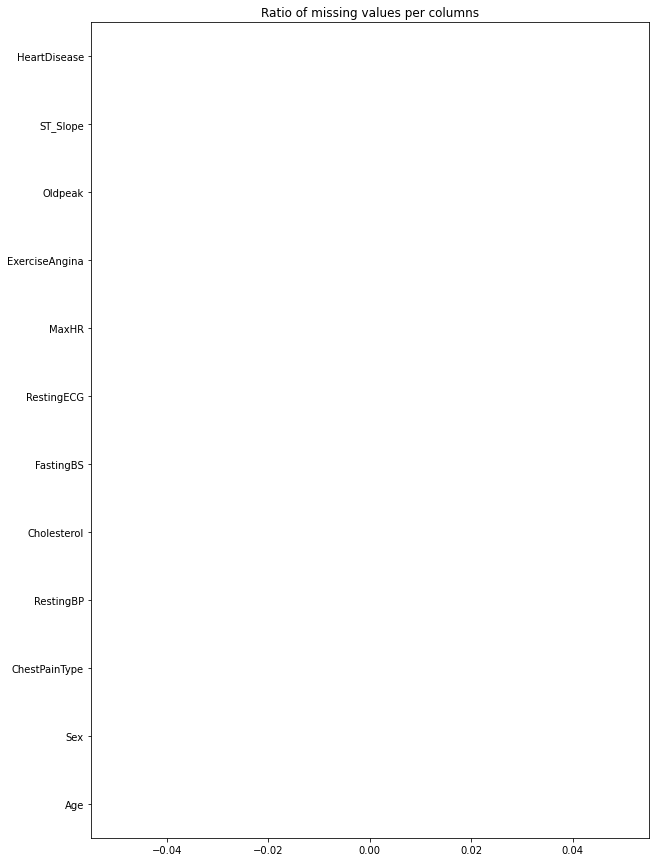

In [ ]:
'''Missing Value Chart'''
plt.figure(figsize=(10, 15))
df.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")
print(df.isnull().values.sum()) #total missing values

There is no missing value in the dataset


**Checking Data Duplicates**

In [ ]:
df[df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


There is no duplicate data in the dataset

**Checking Label Proportion**

In [ ]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
print(df.HeartDisease.value_counts(normalize=True)*100)
print('\n')

1    55.337691
0    44.662309
Name: HeartDisease, dtype: float64




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


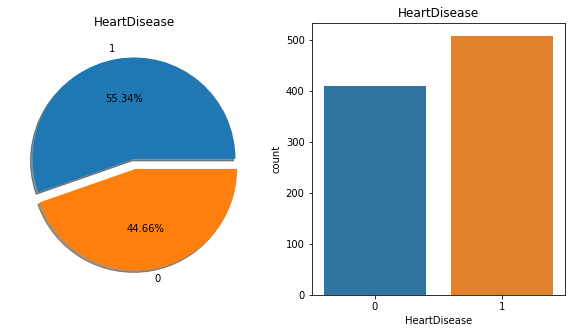

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['HeartDisease'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0],shadow=True)
ax[0].set_title('HeartDisease')
ax[0].set_ylabel('')
sns.countplot('HeartDisease',data=df,ax=ax[1])
ax[1].set_title('HeartDisease')
plt.show()

Significant differences in the proportion of labels in the classification case can cause computers/machines to not learn well so that the model formed can only recognize dominant labels.

There is significant difference in the proportion of labels in this dataset so we will balancing later

**Descriptive Statistics**

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63c5140790>,
      dtype=object)

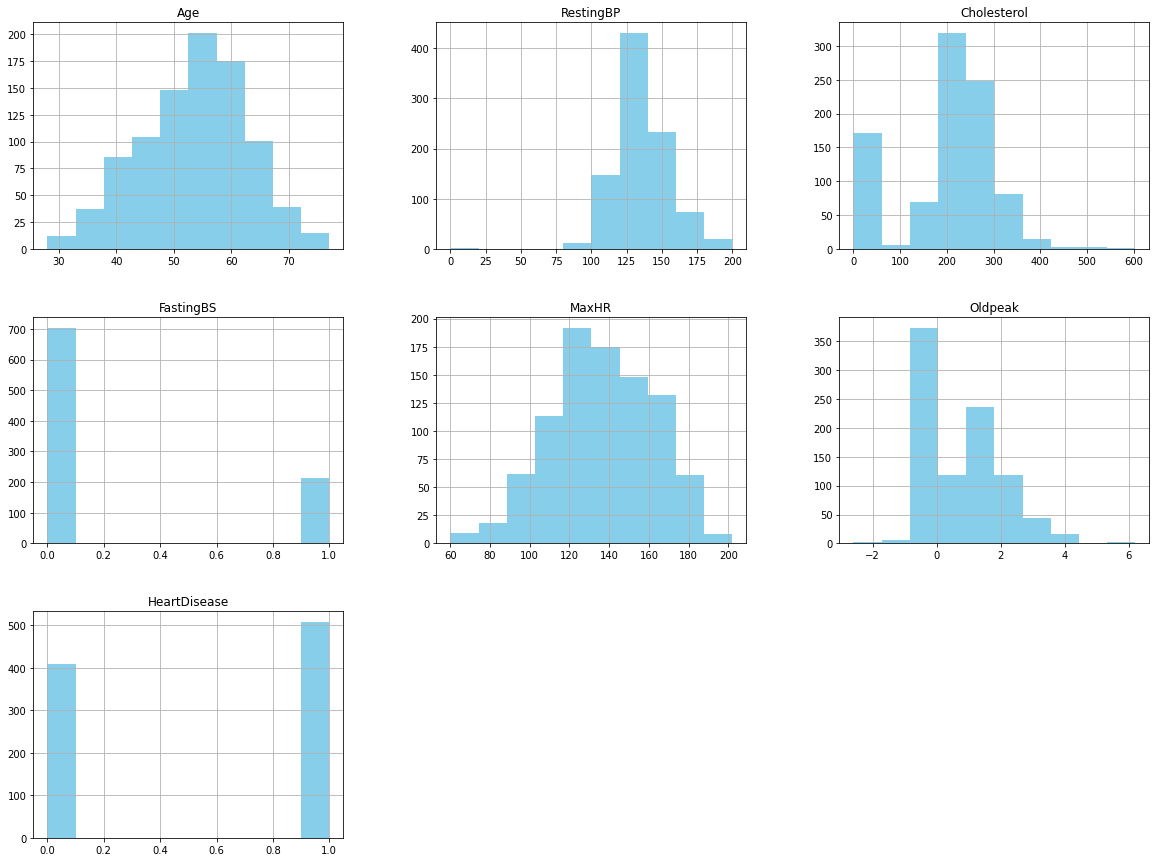

In [ ]:
df.hist(figsize=(20,15),color="skyblue")

Data is not normally distributed


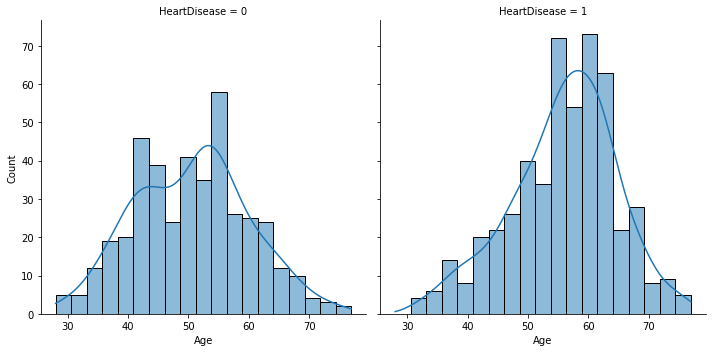

In [ ]:
sns.displot(data=df, x="Age", col='HeartDisease', kde=True)
plt.show()

Most people who experience heart failure are aged 55-65 years old and who not experience heart failure are aged 40-55 years old.

**Pair Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


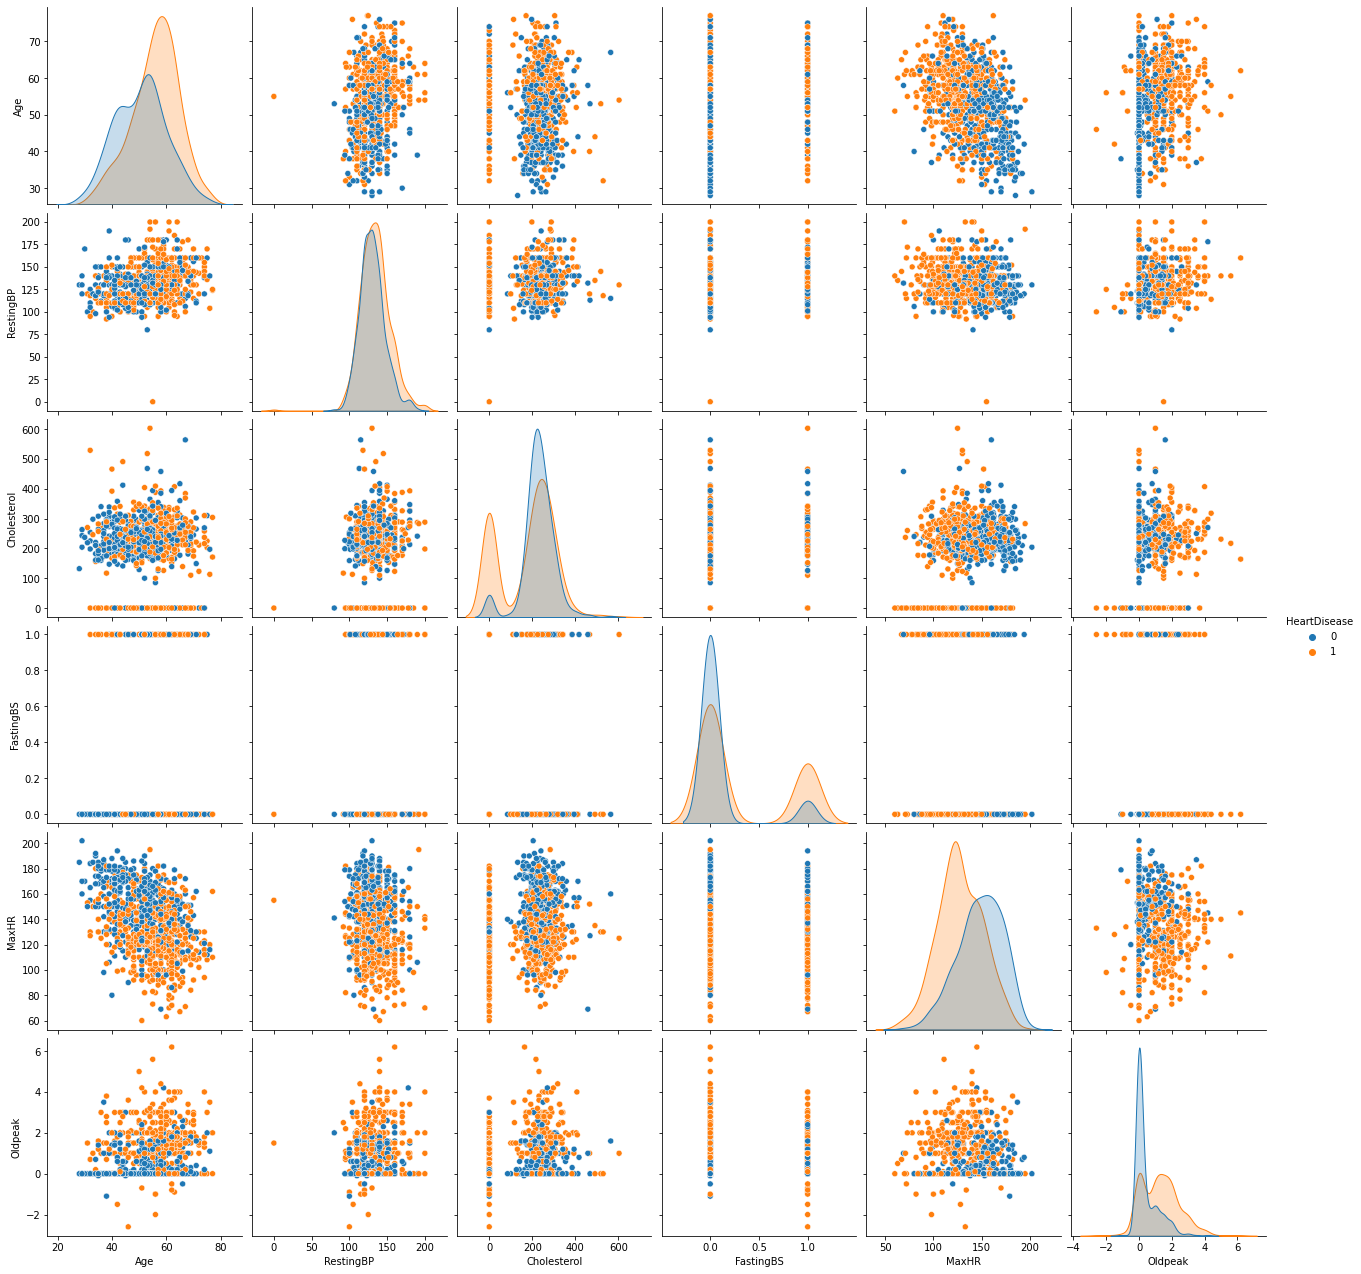

In [ ]:
sns.pairplot(data=df,hue="HeartDisease",size=3);
plt.show()

There is a negative correlation between MaxHR and Age but not too big.



(0.0, 209.1)

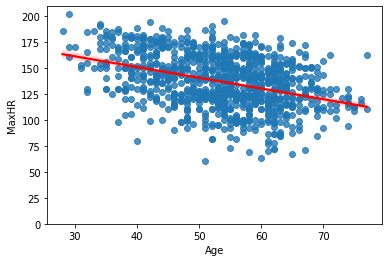

In [ ]:
sns.regplot(x='Age',y='MaxHR',data=df,line_kws={"color": "red"})
plt.ylim(0,)

**Correlation**

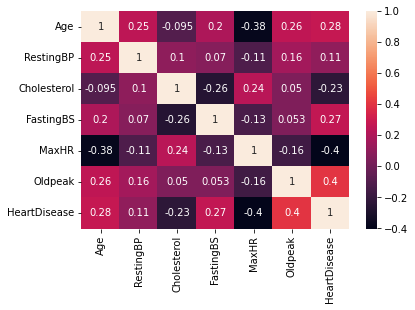

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64

The highest correlation is between HeartDisease and Oldpeak HeartDisease and HeartDisease and MaxHR

(0.0, 1.786654276528306)

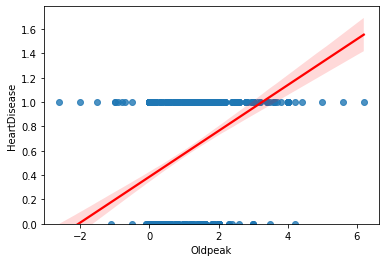

In [ ]:
sns.regplot(x='Oldpeak',y='HeartDisease',data=df,line_kws={"color": "red"})
plt.ylim(0,)

(0.0, 1.3072463376037313)

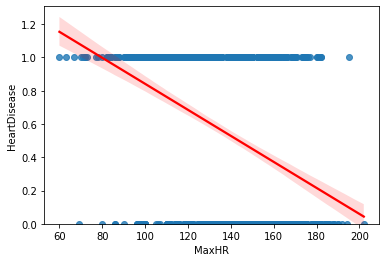

In [ ]:
sns.regplot(x='MaxHR',y='HeartDisease',data=df,line_kws={"color": "red"})
plt.ylim(0,)

####**Checking for Multicollinearity**####

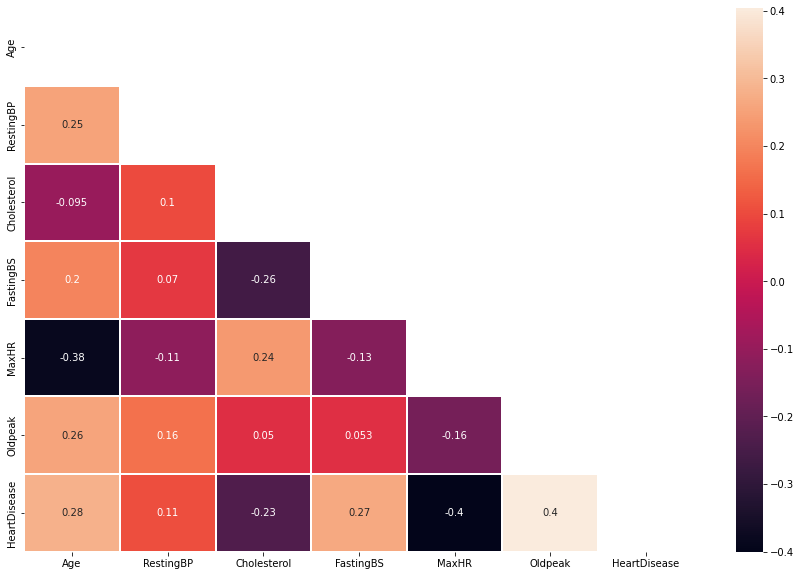

In [ ]:
# checking for multicollinearity

plt.figure(figsize = (15, 10))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

From the above plot, we can see that there is only low correlation between features so we don't need to remove it.



**Data Exploration**

####**Age**####

**Descriptive Statistics**

In [ ]:
df.Age.describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

**Data Proportion**

In [ ]:
df.Age.value_counts()

54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: Age, dtype: int64

In [ ]:
print(df.Age.value_counts(normalize=True)*100)
print('\n')

54    5.555556
58    4.575163
55    4.466231
56    4.139434
57    4.139434
52    3.921569
51    3.812636
59    3.812636
62    3.812636
53    3.594771
60    3.485839
48    3.376906
61    3.376906
63    3.267974
50    2.723312
46    2.614379
41    2.614379
43    2.614379
64    2.396514
65    2.287582
49    2.287582
47    2.069717
44    2.069717
42    1.960784
45    1.960784
38    1.742919
67    1.633987
39    1.633987
66    1.416122
69    1.416122
40    1.416122
35    1.198257
37    1.198257
68    1.089325
34    0.762527
74    0.762527
70    0.762527
36    0.653595
71    0.544662
32    0.544662
72    0.435730
29    0.326797
75    0.326797
33    0.217865
77    0.217865
76    0.217865
31    0.217865
30    0.108932
28    0.108932
73    0.108932
Name: Age, dtype: float64




**Unique Values**

In [ ]:
df.Age.unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71])

**Number of Unique Values**

In [ ]:
df.Age.nunique()

50

**Count of Age Bar Chart**

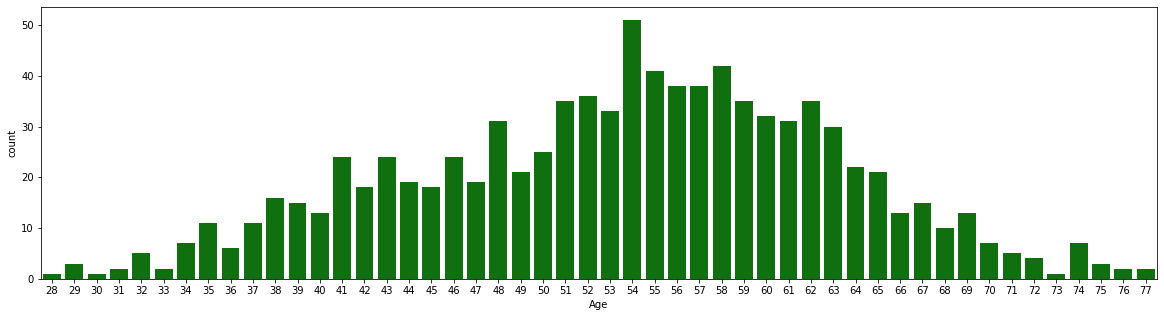

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(x="Age", data=df, color='green',palette=None)
Age = df.Age.value_counts()
plt.show()

From the figure above, it can be seen that the highest value of count of Age is 54 years old and the lowest are 28, 30 and 73 years old. The largest age is dominated by the age of 51-63 years old

**Age vs HeartDisease Bar Chart**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


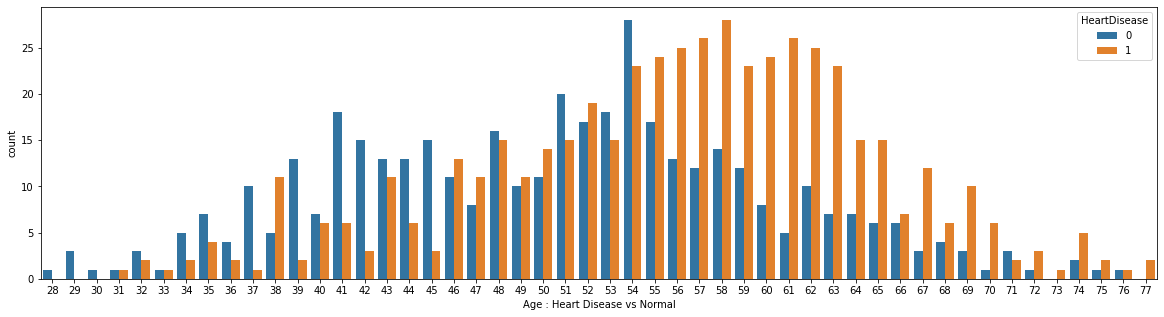

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot('Age',hue='HeartDisease',data=df)
plt.xlabel('Age : Heart Disease vs Normal')
plt.legend(frameon=True, loc=1, title='HeartDisease')
plt.show()

The highest age who have HeartDisease of 1 is 58 years old and who have HeartDisease of 0 is 54 years old. 

In [ ]:
df.groupby(['Age','HeartDisease'])['HeartDisease'].count().sort_values(ascending=False)

Age  HeartDisease
58   1               28
54   0               28
61   1               26
57   1               26
62   1               25
                     ..
75   0                1
30   0                1
76   0                1
     1                1
28   0                1
Name: HeartDisease, Length: 95, dtype: int64

In [ ]:
df.groupby(['Age','HeartDisease'])['HeartDisease'].count()

Age  HeartDisease
28   0               1
29   0               3
30   0               1
31   0               1
     1               1
                    ..
75   0               1
     1               2
76   0               1
     1               1
77   1               2
Name: HeartDisease, Length: 95, dtype: int64

From the figure above, it can be seen that the most person who had age 58 years old were more had HeartDisease and who had age 54-63 years old greater chance of developing HeartDisease. The most person who had age 54 years old were more normal.


**Distribution Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


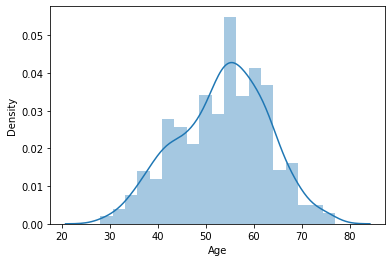

In [ ]:
sns.distplot(df['Age'])

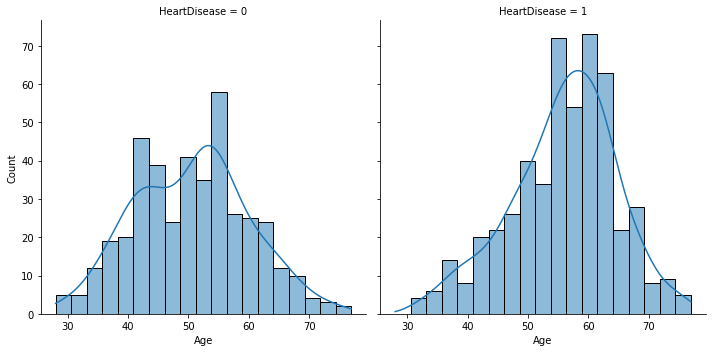

In [ ]:
sns.displot(data=df, x="Age", col='HeartDisease', kde=True)
plt.show()

Data is not normally distributed but has positive skewness

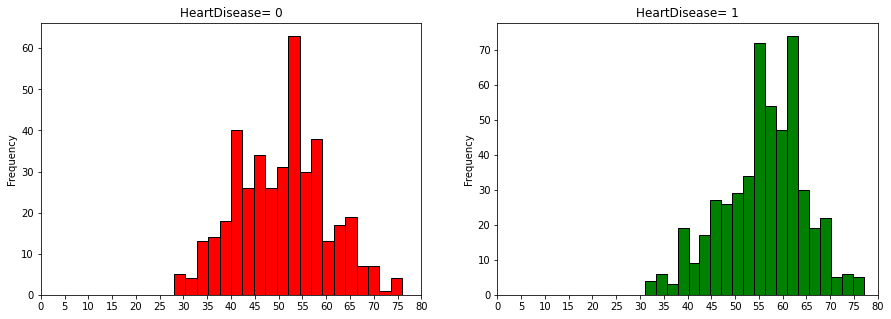

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df[df['HeartDisease']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('HeartDisease= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
df[df['HeartDisease']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('HeartDisease= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

**Checking Outliers with Boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


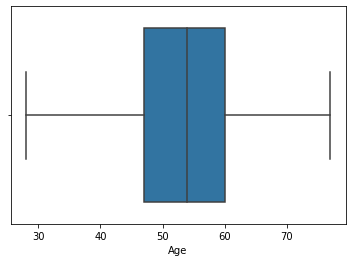

In [ ]:
sns.boxplot(df['Age'])

There are no outliers in Age

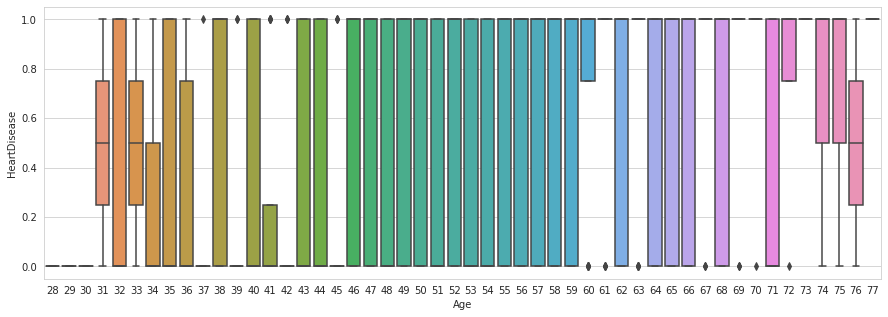

In [ ]:
plt.figure(figsize = (15,5))
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Age', y = 'HeartDisease', data = df)

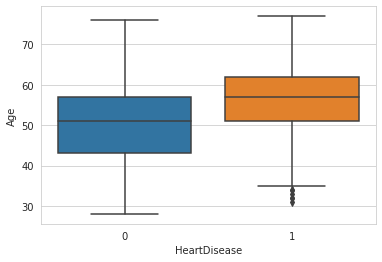

In [ ]:
sns.boxplot(x="HeartDisease", y="Age", data=df)
plt.show()

There were no outliers for Age with HeartDisease of 0 and 1

####**Sex**####

**Descriptive Statistics**

In [ ]:
df.Sex.describe()

count     918
unique      2
top         M
freq      725
Name: Sex, dtype: object

**Data Proportion**

In [ ]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [ ]:
print(df.Sex.value_counts(normalize=True)*100)
print('\n')

M    78.976035
F    21.023965
Name: Sex, dtype: float64




**Unique Values**

In [ ]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

**Number of Unique Values**

In [ ]:
df.Sex.nunique()

2

**Count of Sex Bar Chart**

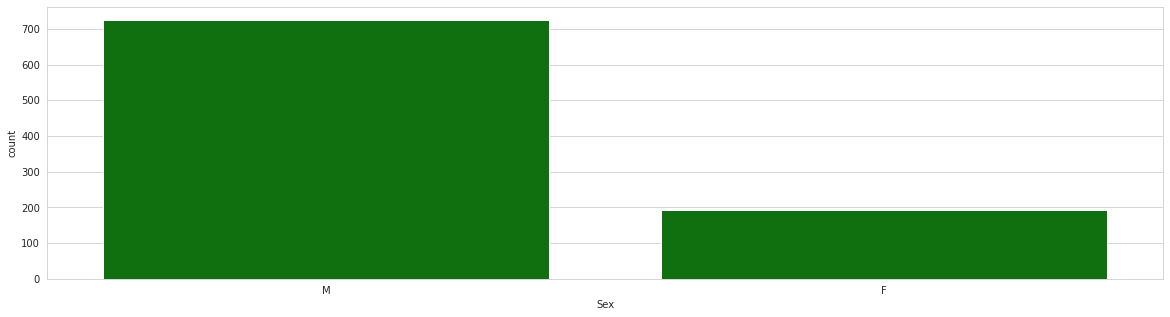

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(x="Sex", data=df, color='green',palette=None)
Sex = df.Sex.value_counts()
plt.show()

From the figure above, it can be seen that the highest frequncy of Sex is Male

###**Sex vs HeartDisease Bar Chart**###

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


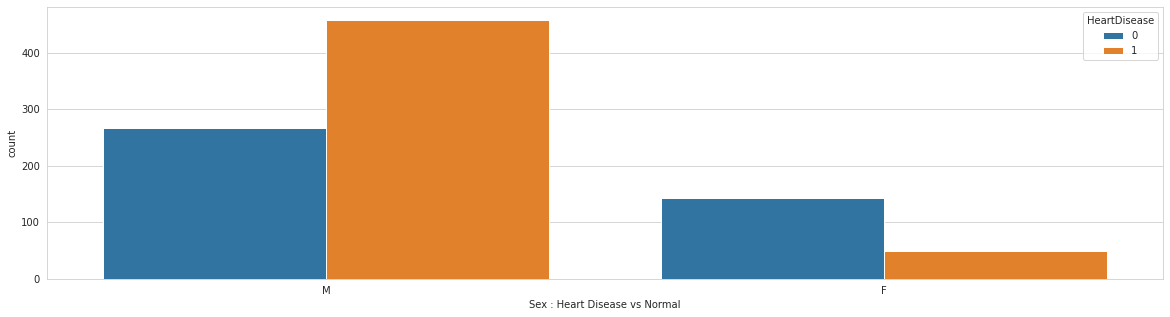

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot('Sex',hue='HeartDisease',data=df)
plt.xlabel('Sex : Heart Disease vs Normal')
plt.legend(frameon=True, loc=1, title='HeartDisease')
plt.show()

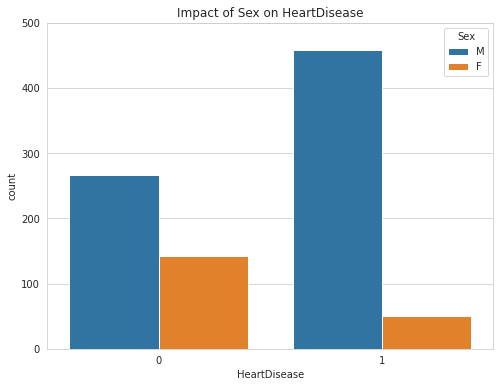

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='HeartDisease', data=df, hue='Sex')
ax.set_ylim(0,500)
plt.title("Impact of Sex on HeartDisease")
plt.show()

In [ ]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count().sort_values(ascending=False)

Sex  HeartDisease
M    1               458
     0               267
F    0               143
     1                50
Name: HeartDisease, dtype: int64

From the figure above, it can be seen that Men are more likely to have Heart Disease and be Normal.


####**ChestPainType**####

**Descriptive Statistics**

In [ ]:
df.ChestPainType.describe()

count     918
unique      4
top       ASY
freq      496
Name: ChestPainType, dtype: object

**Data Proportion**

In [ ]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
print(df.ChestPainType.value_counts(normalize=True)*100)
print('\n')

ASY    54.030501
NAP    22.113290
ATA    18.845316
TA      5.010893
Name: ChestPainType, dtype: float64




**Unique Values**

In [ ]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

**Number of Unique Values**

In [ ]:
df.ChestPainType.nunique()

4

**Count of ChestPainType Bar Chart**

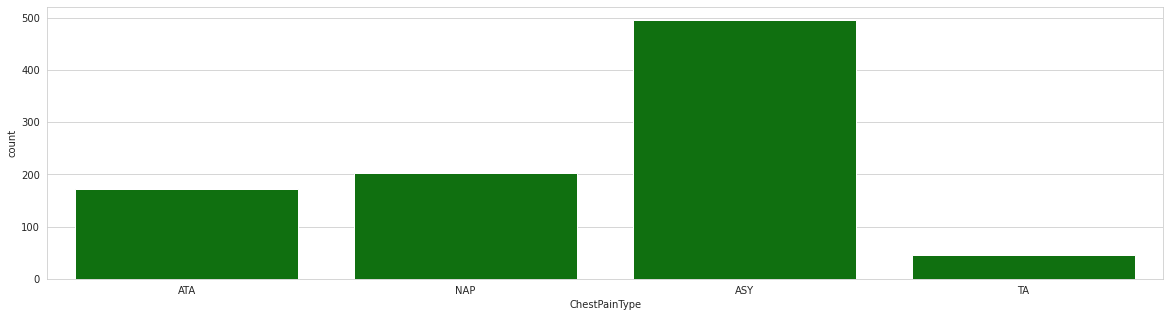

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(x="ChestPainType", data=df, color='green',palette=None)
ChestPainType = df.ChestPainType.value_counts()
plt.show()

From the figure above, it can be seen that the highest frequncy of ChestPainType is ASY

###**ChestPainType vs HeartDisease Bar Chart**###

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


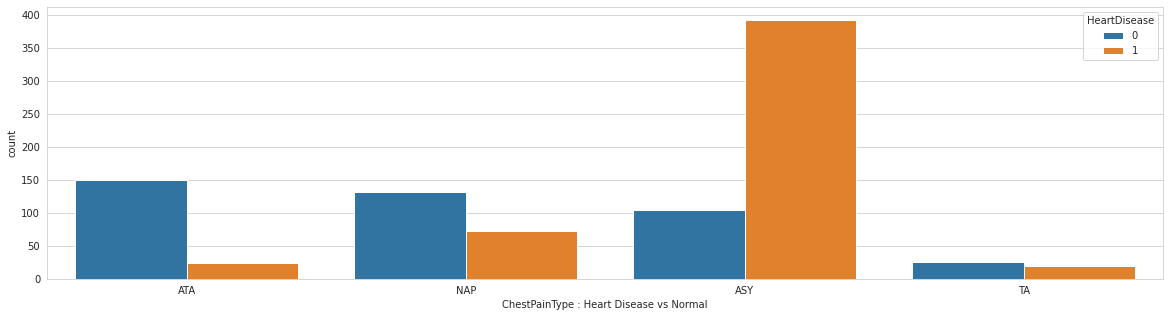

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot('ChestPainType',hue='HeartDisease',data=df)
plt.xlabel('ChestPainType : Heart Disease vs Normal')
plt.legend(frameon=True, loc=1, title='HeartDisease')
plt.show()

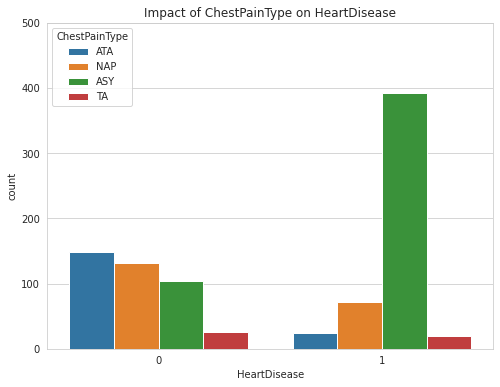

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='HeartDisease', data=df, hue='ChestPainType')
ax.set_ylim(0,500)
plt.title("Impact of ChestPainType on HeartDisease")
plt.show()

In [ ]:
df.groupby(['ChestPainType','HeartDisease'])['HeartDisease'].count().sort_values(ascending=False)

ChestPainType  HeartDisease
ASY            1               392
ATA            0               149
NAP            0               131
ASY            0               104
NAP            1                72
TA             0                26
ATA            1                24
TA             1                20
Name: HeartDisease, dtype: int64

From the figure above, it can be seen that the ChestPainType of ASY are more likely to have Heart Disease and the ChestPainType of ATA less chance to have Heart Disease. The ChestPainType of ATA are more likely to be normal and the ChestPainType of TA less chance to be normal.


####**RestingBP**####

**Descriptive Statistics**

In [ ]:
df.RestingBP.describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

**Data Proportion**

In [ ]:
df.RestingBP.value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64

In [ ]:
print(df.RestingBP.value_counts(normalize=True)*100)
print('\n')

120    14.379085
130    12.854031
140    11.655773
110     6.318083
150     5.991285
         ...    
185     0.108932
98      0.108932
92      0.108932
113     0.108932
164     0.108932
Name: RestingBP, Length: 67, dtype: float64




**Unique Values**

In [ ]:
df.RestingBP.unique()

array([140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125,
       145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106,
        92, 200, 122,  98, 105, 133,  95,  80, 137, 185, 165, 126, 152,
       116,   0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123,
       102,  96, 143, 172, 156, 114, 127, 101, 174,  94, 148, 117, 192,
       129, 164])

**Number of Unique Values**

In [ ]:
df.RestingBP.nunique()

67

**Count of RestingBP Bar Chart**

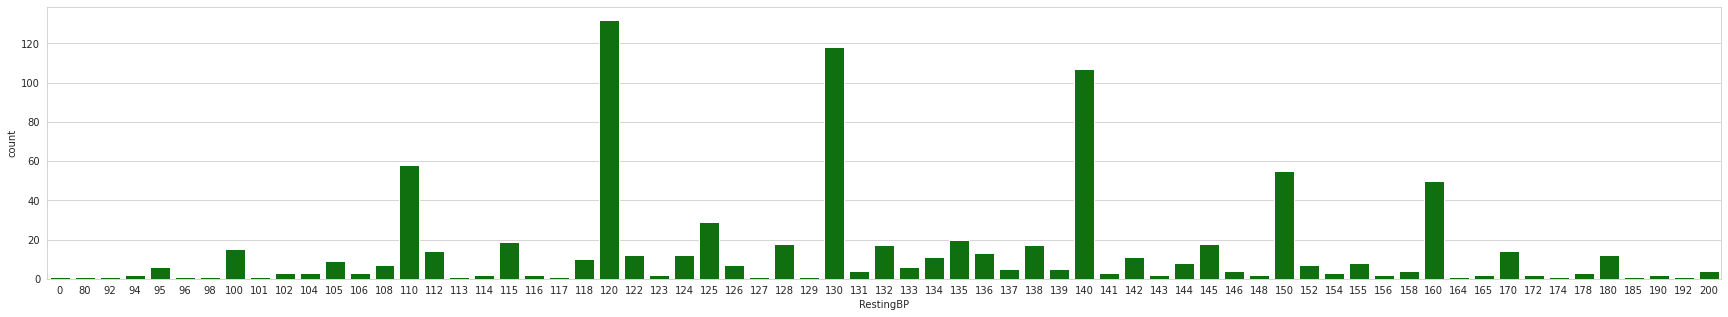

In [ ]:
plt.figure(figsize = (30,5))
sns.countplot(x="RestingBP", data=df, color='green',palette=None)
RestingBP = df.RestingBP.value_counts()
plt.show()

From the figure above, it can be seen that the highest value of count of RestingBP is 120.0 and the lowest are 92.0, 96.0, 98.0, 113.0, 117.0, 127.0, 129.0 and 164.0. 

**RestingBP vs HeartDisease Bar Chart**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


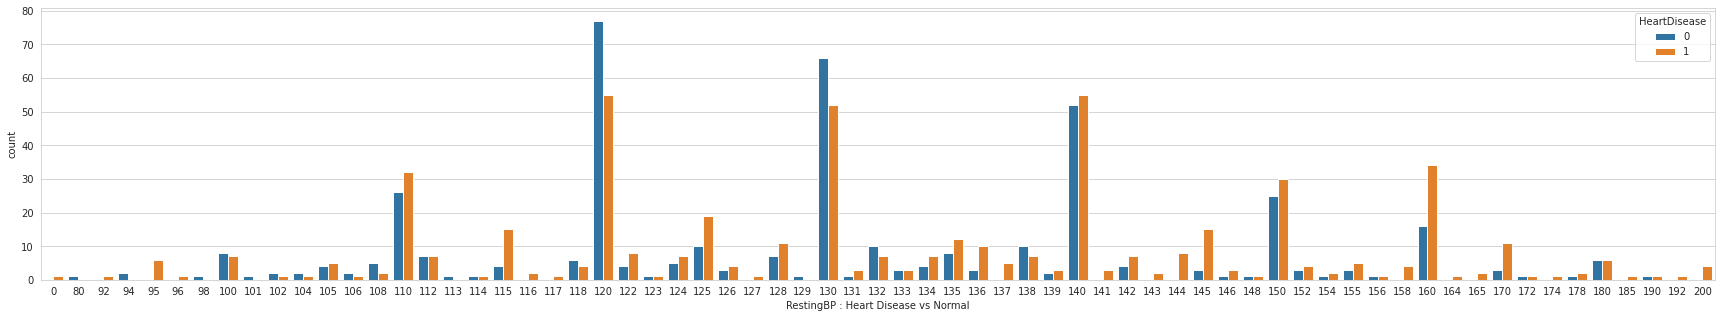

In [ ]:
plt.figure(figsize = (30,5))
sns.countplot('RestingBP',hue='HeartDisease',data=df)
plt.xlabel('RestingBP : Heart Disease vs Normal')
plt.legend(frameon=True, loc=1, title='HeartDisease')
plt.show()

In [ ]:
df.groupby(['RestingBP','HeartDisease'])['HeartDisease'].count().sort_values(ascending=False)

RestingBP  HeartDisease
120        0               77
130        0               66
140        1               55
120        1               55
130        1               52
                           ..
148        1                1
           0                1
114        0                1
146        0                1
0          1                1
Name: HeartDisease, Length: 110, dtype: int64

In [ ]:
df.groupby(['RestingBP','HeartDisease'])['HeartDisease'].count()

RestingBP  HeartDisease
0          1               1
80         0               1
92         1               1
94         0               2
95         1               6
                          ..
185        1               1
190        0               1
           1               1
192        1               1
200        1               4
Name: HeartDisease, Length: 110, dtype: int64

From the figure above, it can be seen that the most person who had RestingBP of 120.0 bigger chance to had Heart Disease.


**Distribution Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


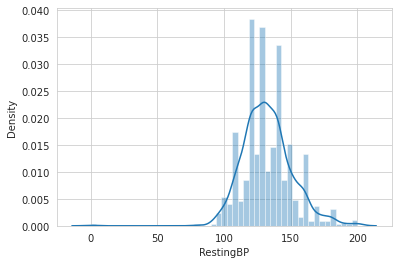

In [ ]:
sns.distplot(df['RestingBP'])

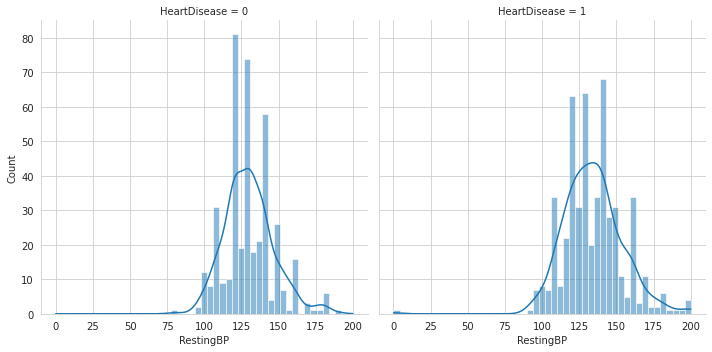

In [ ]:
sns.displot(data=df, x="RestingBP", col='HeartDisease', kde=True)
plt.show()

Data is not normally distributed but negative skewness

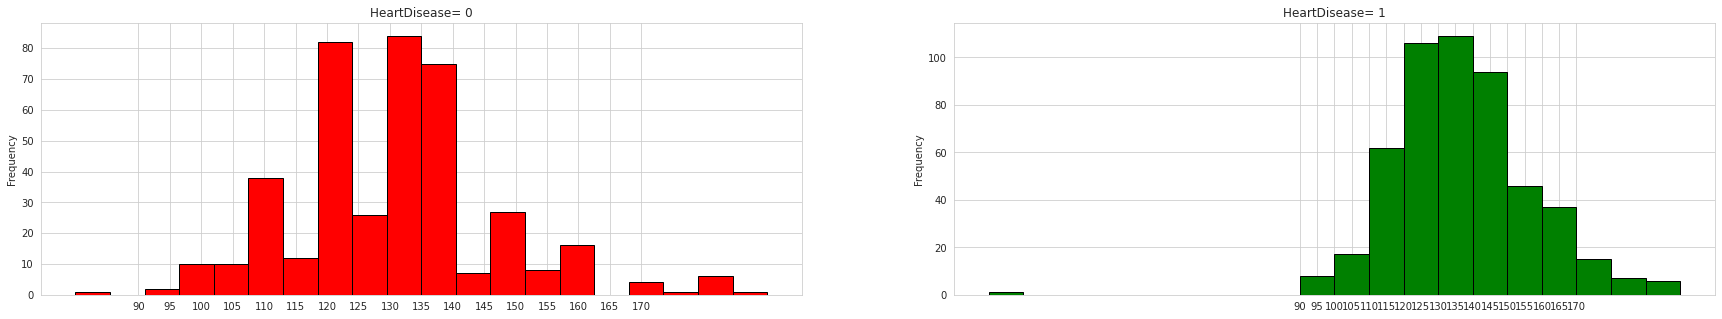

In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,5))
df[df['HeartDisease']==0].RestingBP.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('HeartDisease= 0')
x1=list(range(90,175,5))
ax[0].set_xticks(x1)
df[df['HeartDisease']==1].RestingBP.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('HeartDisease= 1')
x2=list(range(90,175,5))
ax[1].set_xticks(x2)
plt.show()

RestingBP of 140-145 the most HeartDisease of 1 and RestingBP 115-120 is the lowest HeartDisease of 0

**Checking Outliers with Boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


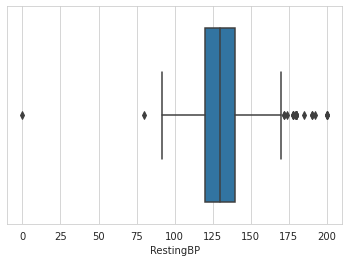

In [ ]:
sns.boxplot(df['RestingBP'])

There are not outliers in REstingBP

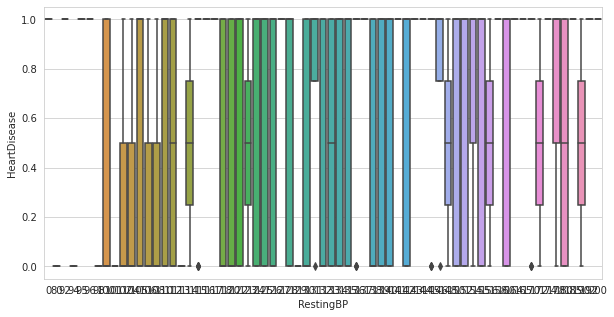

In [ ]:
plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
  
sns.boxplot(x = 'RestingBP', y = 'HeartDisease', data = df)

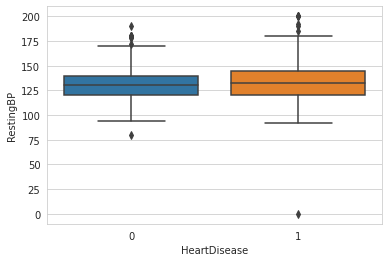

In [ ]:
sns.boxplot(x="HeartDisease", y="RestingBP", data=df)
plt.show()

There were no outliers for REstingBP with HeartDisease of 0 and 1

####**Cholesterol**####

**Descriptive Statistics**

In [ ]:
df.Cholesterol.describe()

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

**Data Proportion**

In [ ]:
df.Cholesterol.value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [ ]:
(df['Cholesterol'].value_counts()==1).sum()

66

In [ ]:
print(df.Cholesterol.value_counts(normalize=True)*100)
print('\n')

0      18.736383
254     1.198257
223     1.089325
220     1.089325
230     0.980392
         ...    
392     0.108932
316     0.108932
153     0.108932
466     0.108932
131     0.108932
Name: Cholesterol, Length: 222, dtype: float64




**Unique Values**

In [ ]:
df.Cholesterol.unique()

array([289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204,
       234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468,
       188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294,
       264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365,
       342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163,
       529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147,  85,
       269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156,
       272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279,
       198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320,
       187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219,
       257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309,
       200, 336, 355, 326, 171, 491, 271, 274, 394, 221, 126, 305, 220,
       242, 347, 344, 358, 169, 181,   0, 236, 203, 153, 316, 311, 252,
       458, 384, 258, 349, 142, 197, 113, 261, 310, 232, 110, 12

**Number of Unique Values**

In [ ]:
df.Cholesterol.nunique()

222

**Count of RestingBP Bar Chart**

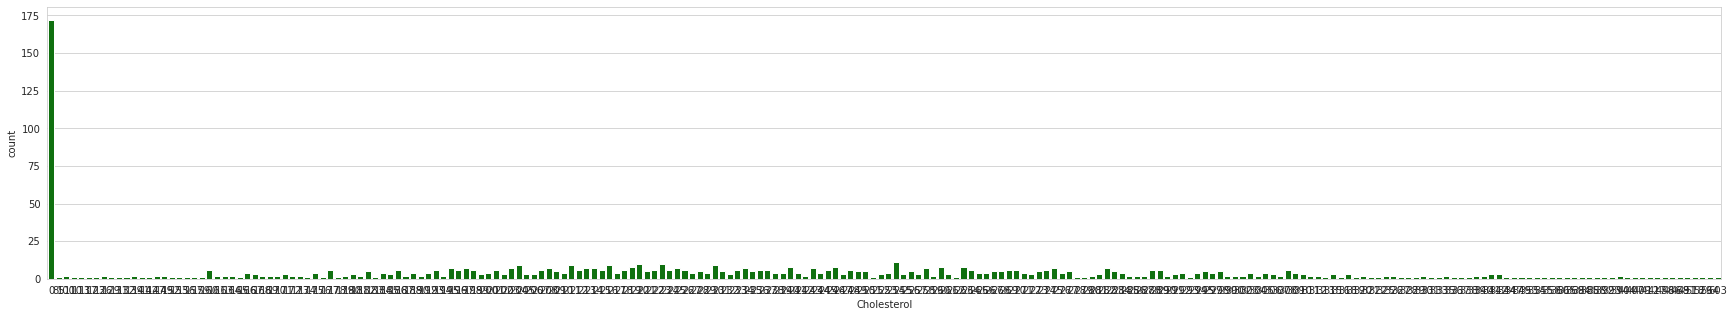

In [ ]:
plt.figure(figsize = (30,5))
sns.countplot(x="Cholesterol", data=df, color='green',palette=None)
RestingBP = df.RestingBP.value_counts()
plt.show()

From the figure above, it can be seen that the highest value of count of Cholesterol is 0 and the lowest of 1 count are 55 values

**Cholesterol vs HeartDisease Bar Chart**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


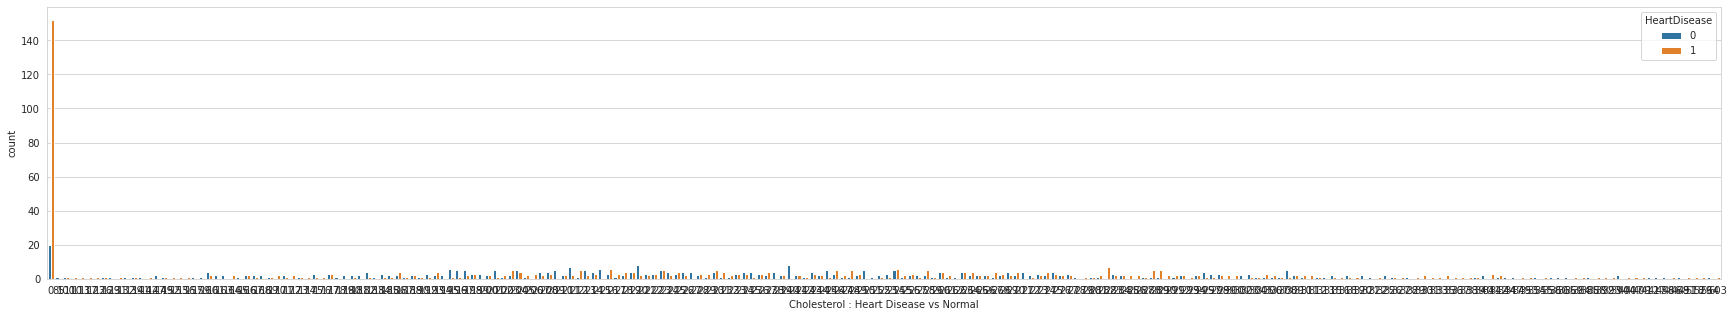

In [ ]:
plt.figure(figsize = (30,5))
sns.countplot('Cholesterol',hue='HeartDisease',data=df)
plt.xlabel('Cholesterol : Heart Disease vs Normal')
plt.legend(frameon=True, loc=1, title='HeartDisease')
plt.show()

In [ ]:
df.groupby(['Cholesterol','HeartDisease'])['HeartDisease'].count().sort_values(ascending=False)

Cholesterol  HeartDisease
0            1               152
             0                20
220          0                 8
240          0                 8
282          1                 7
                            ... 
253          1                 1
123          1                 1
117          1                 1
165          0                 1
603          1                 1
Name: HeartDisease, Length: 344, dtype: int64

In [ ]:
df.groupby(['Cholesterol','HeartDisease'])['HeartDisease'].count()

Cholesterol  HeartDisease
0            0                20
             1               152
85           0                 1
100          0                 1
             1                 1
                            ... 
491          1                 1
518          1                 1
529          1                 1
564          0                 1
603          1                 1
Name: HeartDisease, Length: 344, dtype: int64

From the figure above, it can be seen that the most person who had Cholesterol of 0.0 bigger chance to had Heart Disease and also be Normal.


**Distribution Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


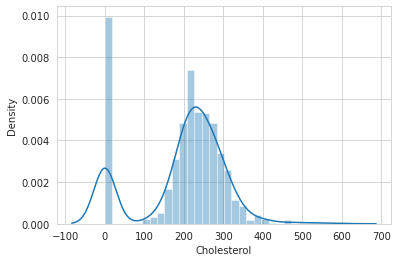

In [ ]:
sns.distplot(df['Cholesterol'])

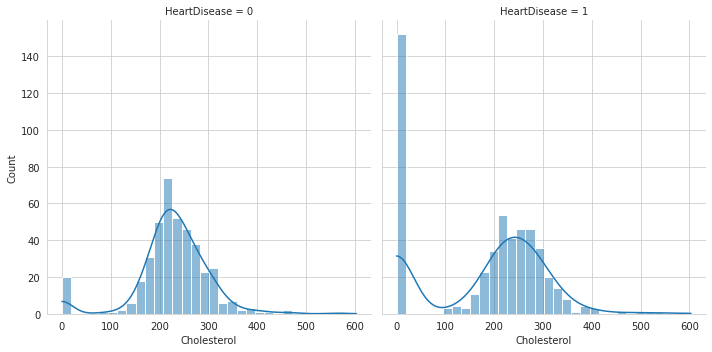

In [ ]:
sns.displot(data=df, x="Cholesterol", col='HeartDisease', kde=True)
plt.show()

Data is not normally distributed but positive skewness

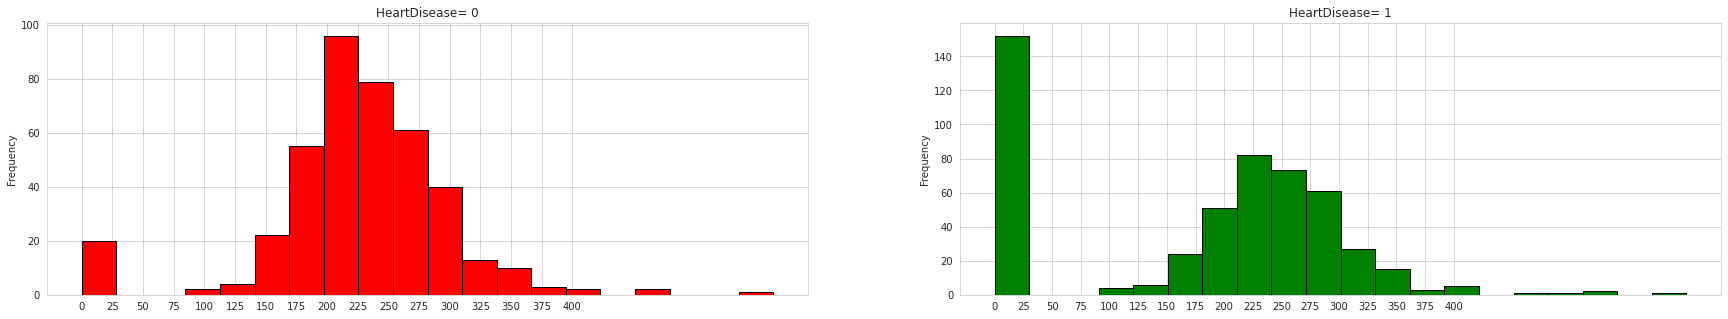

In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,5))
df[df['HeartDisease']==0].Cholesterol.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('HeartDisease= 0')
x1=list(range(0,410,25))
ax[0].set_xticks(x1)
df[df['HeartDisease']==1].Cholesterol.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('HeartDisease= 1')
x2=list(range(0,410,25))
ax[1].set_xticks(x2)
plt.show()

Cholesterol of 0.0 the highest HeartDisease of 1, cholesterol of 200-300 is quite big of HeartDisease of 1  and Cholesterol 200-225 is the highest HeartDisease of 0, cholesterol of 200-270 is quite big of HeartDisease of 0.

**Checking Outliers with Boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


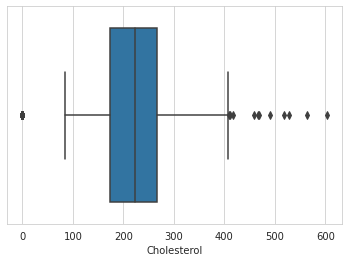

In [ ]:
sns.boxplot(df['Cholesterol'])

There are not outliers in Cholesterol

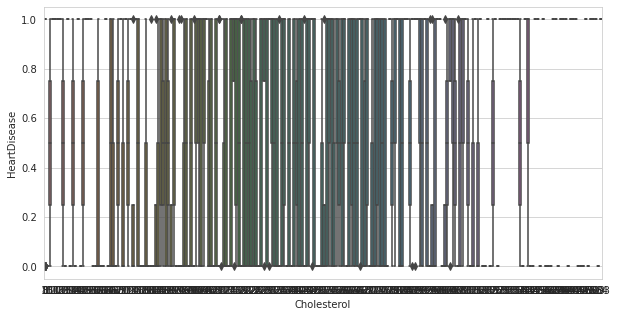

In [ ]:
plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Cholesterol', y = 'HeartDisease', data = df)

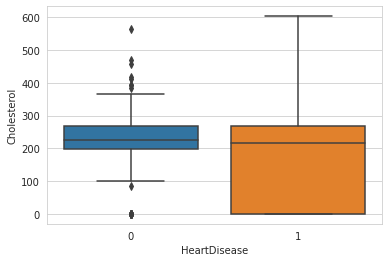

In [ ]:
sns.boxplot(x="HeartDisease", y="Cholesterol", data=df)
plt.show()

There were outliers for Cholesterol with HeartDisease of 0

####**FastingBS**####

**Descriptive Statistics**

In [ ]:
df.FastingBS.describe()

count    918.000000
mean       0.233115
std        0.423046
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: FastingBS, dtype: float64

**Data Proportion**

In [ ]:
df.FastingBS.value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [ ]:
print(df.FastingBS.value_counts(normalize=True)*100)
print('\n')

0    76.688453
1    23.311547
Name: FastingBS, dtype: float64




**Unique Values**

In [ ]:
df.FastingBS.unique()

array([0, 1])

**Number of Unique Values**

In [ ]:
df.FastingBS.nunique()

2

**Count of RestingBP Bar Chart**

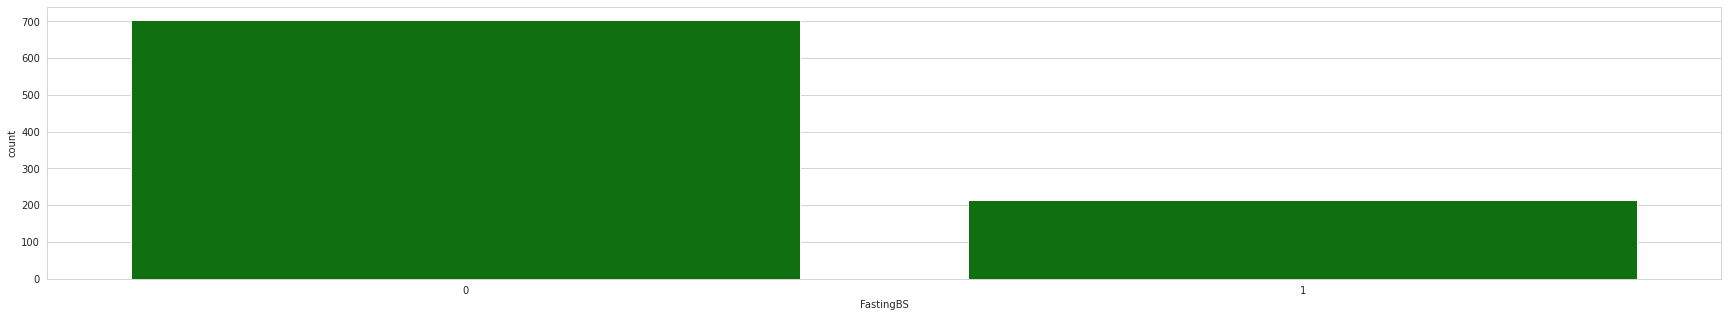

In [ ]:
plt.figure(figsize = (30,5))
sns.countplot(x="FastingBS", data=df, color='green',palette=None)
FastingBS = df.FastingBS.value_counts()
plt.show()

From the figure above, it can be seen that the highest value of count of FastingBSis 0.0

**FastingBS vs HeartDisease Bar Chart**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


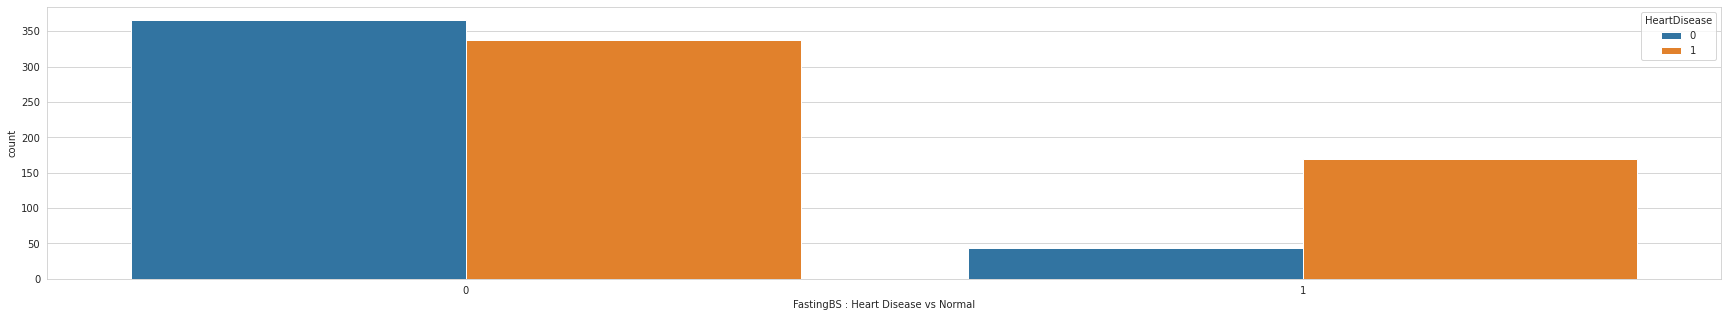

In [ ]:
plt.figure(figsize = (30,5))
sns.countplot('FastingBS',hue='HeartDisease',data=df)
plt.xlabel('FastingBS : Heart Disease vs Normal')
plt.legend(frameon=True, loc=1, title='HeartDisease')
plt.show()

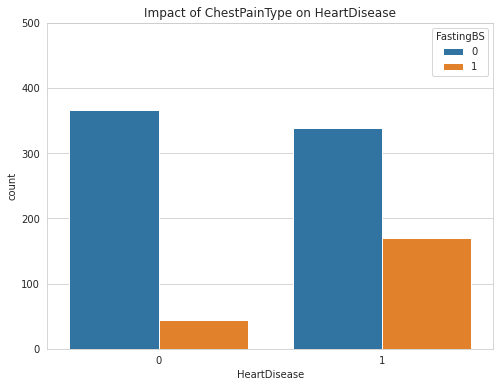

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='HeartDisease', data=df, hue='FastingBS')
ax.set_ylim(0,500)
plt.title("Impact of ChestPainType on HeartDisease")
plt.show()

In [ ]:
df.groupby(['FastingBS','HeartDisease'])['HeartDisease'].count().sort_values(ascending=False)

FastingBS  HeartDisease
0          0               366
           1               338
1          1               170
           0                44
Name: HeartDisease, dtype: int64

The FastingBS of 0.0 have bigger chance to have HeartDisease also normal.

**RestingECG**

**Descriptive Statistics**

In [ ]:
df.RestingECG.describe()

count        918
unique         3
top       Normal
freq         552
Name: RestingECG, dtype: object

**Data Proportion**

In [ ]:
df.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [ ]:
print(df.RestingECG.value_counts(normalize=True)*100)
print('\n')

Normal    60.130719
LVH       20.479303
ST        19.389978
Name: RestingECG, dtype: float64




**Unique Values**

In [ ]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

**Number of Unique Values**

In [ ]:
df.RestingECG.nunique()

3

**Count of RestingBP Bar Chart**

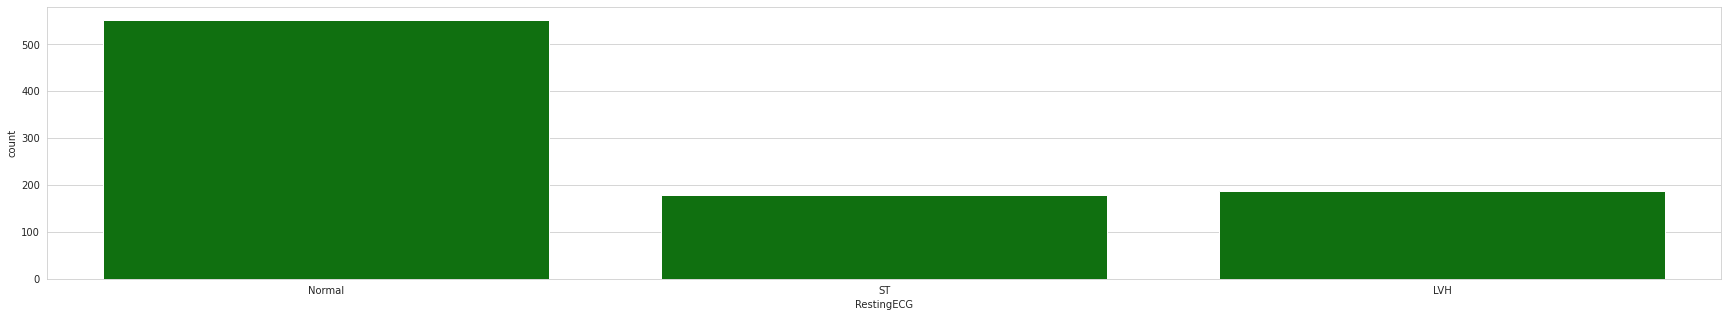

In [ ]:
plt.figure(figsize = (30,5))
sns.countplot(x="RestingECG", data=df, color='green',palette=None)
FastingBS = df.RestingECG.value_counts()
plt.show()

From the figure above, it can be seen that the highest value of count of RestingECG is Normal

**RestingECG vs HeartDisease Bar Chart**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


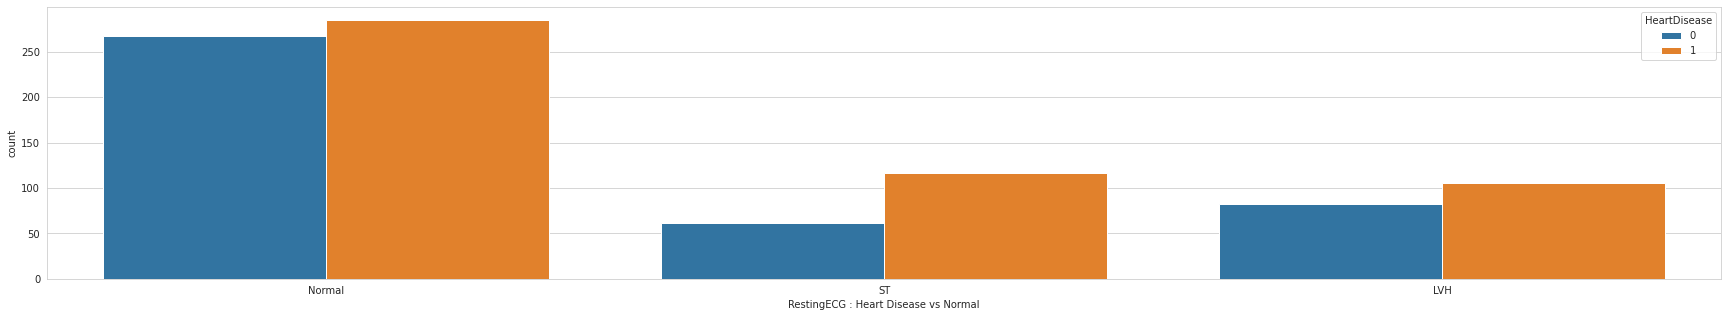

In [ ]:
plt.figure(figsize = (30,5))
sns.countplot('RestingECG',hue='HeartDisease',data=df)
plt.xlabel('RestingECG : Heart Disease vs Normal')
plt.legend(frameon=True, loc=1, title='HeartDisease')
plt.show()

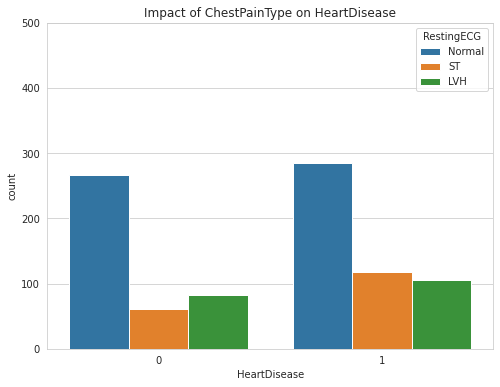

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='HeartDisease', data=df, hue='RestingECG')
ax.set_ylim(0,500)
plt.title("Impact of ChestPainType on HeartDisease")
plt.show()

In [ ]:
df.groupby(['RestingECG','HeartDisease'])['HeartDisease'].count().sort_values(ascending=False)

RestingECG  HeartDisease
Normal      1               285
            0               267
ST          1               117
LVH         1               106
            0                82
ST          0                61
Name: HeartDisease, dtype: int64

The RestingECG of Normal have bigger chance to have HeartDisease and also be Normal.

####**MaxHR**####

**Descriptive Statistics**

In [ ]:
df.MaxHR.describe()

count    918.000000
mean     136.809368
std       25.460334
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

**Data Proportion**

In [ ]:
df.MaxHR.value_counts()

150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: MaxHR, Length: 119, dtype: int64

In [ ]:
print(df.MaxHR.value_counts(normalize=True)*100)
print('\n')

150    4.684096
140    4.466231
120    3.921569
130    3.594771
160    2.723312
         ...   
63     0.108932
83     0.108932
60     0.108932
78     0.108932
202    0.108932
Name: MaxHR, Length: 119, dtype: float64




**Unique Values**

In [ ]:
df.MaxHR.unique()

array([172, 156,  98, 108, 122, 170, 142, 130, 120,  99, 145, 140, 137,
       150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154,
       155,  87, 148, 100, 168, 184, 121, 153, 134,  96, 174, 175, 144,
        82, 135, 115, 128, 116,  94, 110,  92, 180, 152, 124, 106, 185,
       139, 190, 146, 158, 132, 176, 119, 188, 162, 105,  90, 136, 167,
       129, 102, 143, 103,  91, 126,  93, 131, 149, 123, 182, 141,  77,
       109, 133, 179, 113, 104,  95,  72,  97, 117,  86,  63, 157,  83,
        60,  70, 163,  67,  78,  84, 111,  80, 107, 161,  69,  88,  73,
       159, 151, 181, 186, 177, 173, 169, 171, 147,  71, 192, 195, 194,
       187, 202])

**Number of Unique Values**

In [ ]:
df.MaxHR.nunique()

119

**Count of MaxHR Bar Chart**

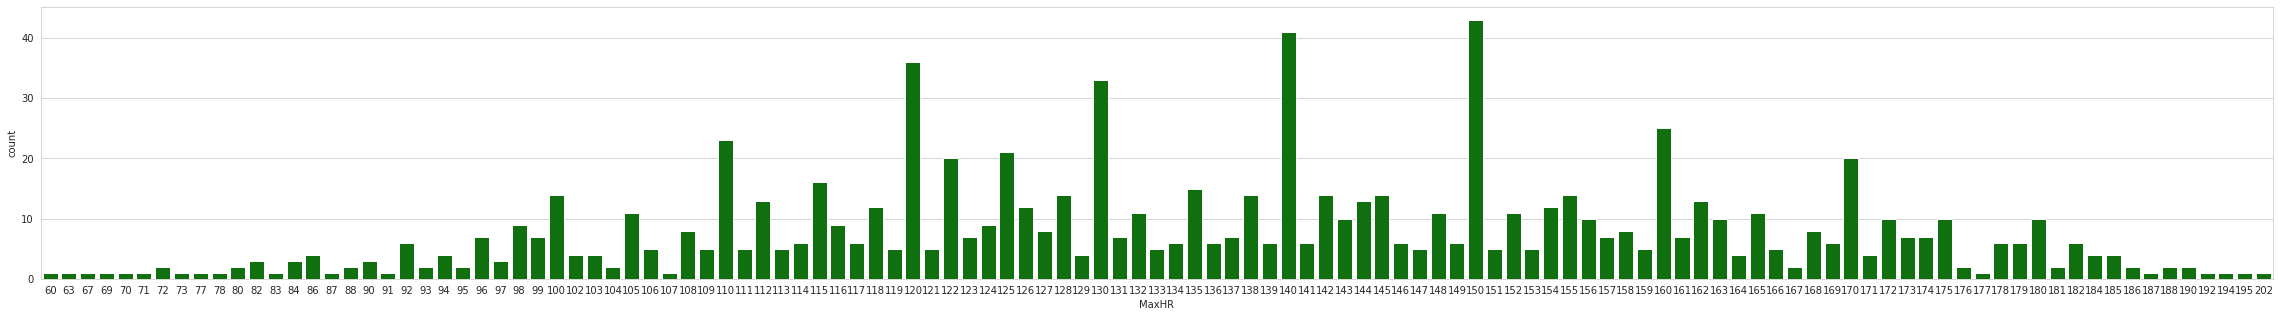

In [ ]:
plt.figure(figsize = (40,5))
sns.countplot(x="MaxHR", data=df, color='green',palette=None)
RestingBP = df.MaxHR.value_counts()
plt.show()

From the figure above, it can be seen that the highest value of count of MaxHR is 120.0 and the lowest of 1 count are 55 values

**Cholesterol vs HeartDisease Bar Chart**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


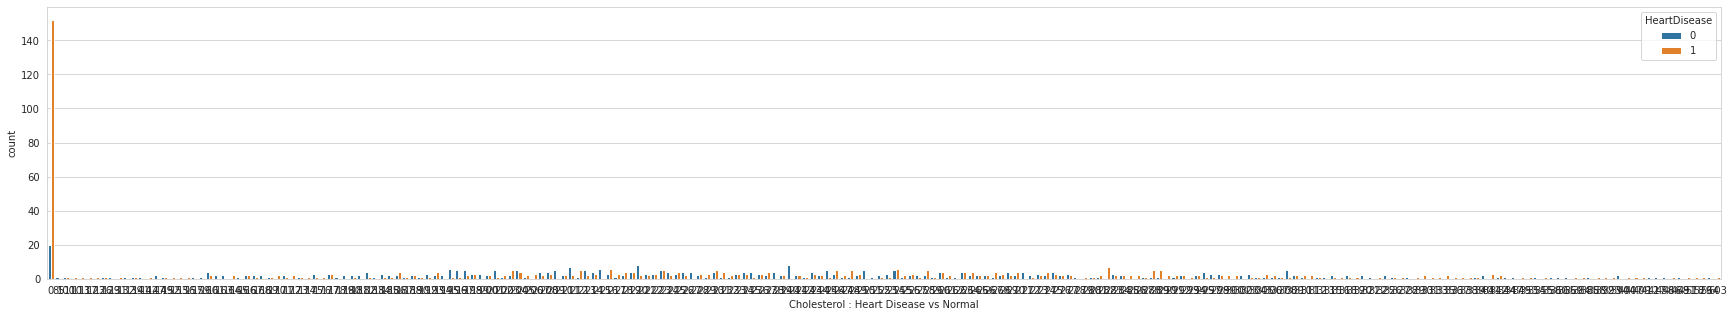

In [ ]:
plt.figure(figsize = (30,5))
sns.countplot('Cholesterol',hue='HeartDisease',data=df)
plt.xlabel('Cholesterol : Heart Disease vs Normal')
plt.legend(frameon=True, loc=1, title='HeartDisease')
plt.show()

In [ ]:
df.groupby(['MaxHR','HeartDisease'])['HeartDisease'].count().sort_values(ascending=False)

MaxHR  HeartDisease
120    1               25
150    1               23
140    1               23
130    1               22
150    0               20
                       ..
123    0                1
124    0                1
129    0                1
63     1                1
202    0                1
Name: HeartDisease, Length: 192, dtype: int64

In [ ]:
df.groupby(['MaxHR','HeartDisease'])['HeartDisease'].count()

MaxHR  HeartDisease
60     1               1
63     1               1
67     1               1
69     0               1
70     1               1
                      ..
190    0               2
192    0               1
194    0               1
195    1               1
202    0               1
Name: HeartDisease, Length: 192, dtype: int64

In [ ]:
(df['MaxHR'].value_counts()==1).sum()

19

From the figure above, it can be seen that the most person who had MaxHr of 150.0 have bigger chance to had Heart Disease and also 17 values of MaxHr have smallest chance to had Heart Diseasbe

**Distribution Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


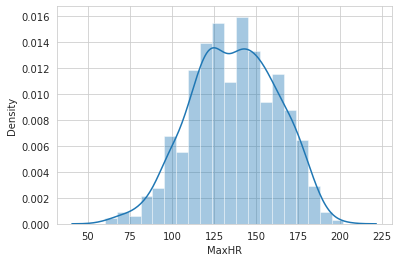

In [ ]:
sns.distplot(df['MaxHR'])

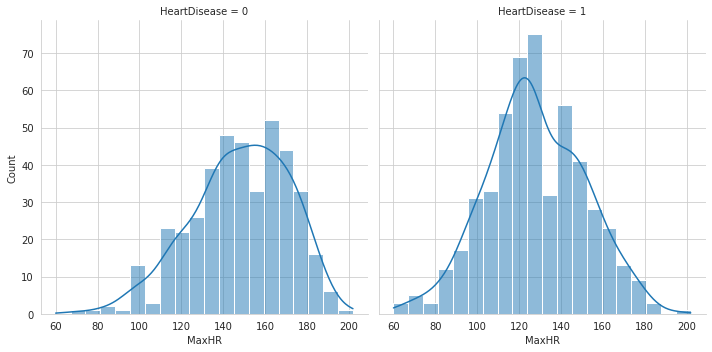

In [ ]:
sns.displot(data=df, x="MaxHR", col='HeartDisease', kde=True)
plt.show()

Data is not normally distributed but negative skewness

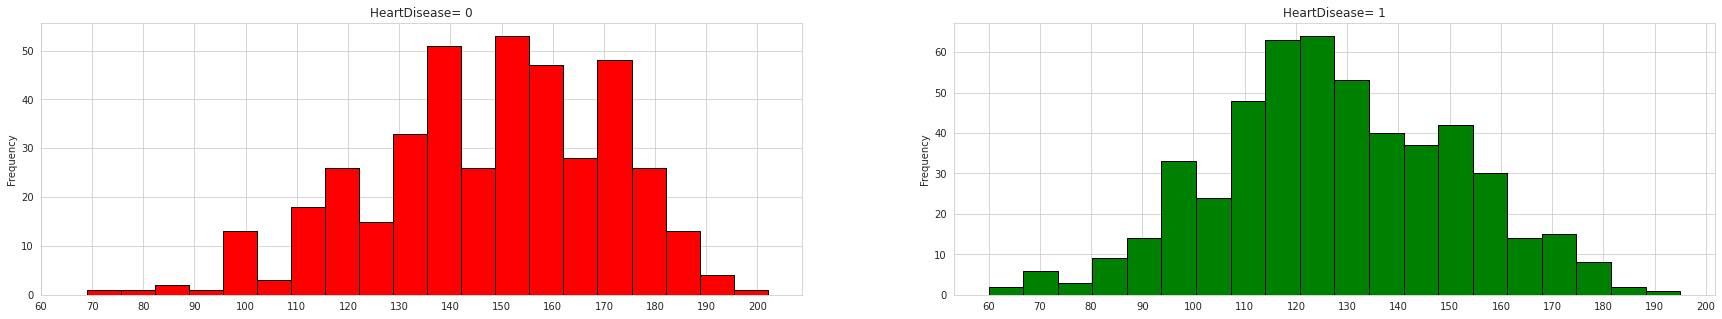

In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,5))
df[df['HeartDisease']==0].MaxHR.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('HeartDisease= 0')
x1=list(range(60,205,10))
ax[0].set_xticks(x1)
df[df['HeartDisease']==1].MaxHR.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('HeartDisease= 1')
x2=list(range(60,205,10))
ax[1].set_xticks(x2)
plt.show()

MaxHR of of 235-130 have the highest HeartDisease of 1, and MaxHR of 150-155 have the highest HeartDisease of 0.

**Checking Outliers with Boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


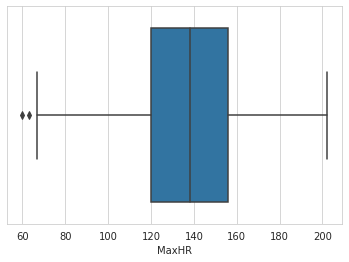

In [ ]:
sns.boxplot(df['MaxHR'])

There are not outliers in MaxHR

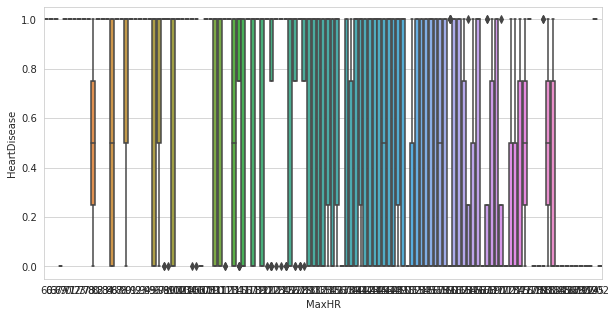

In [ ]:
plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
  
sns.boxplot(x = 'MaxHR', y = 'HeartDisease', data = df)

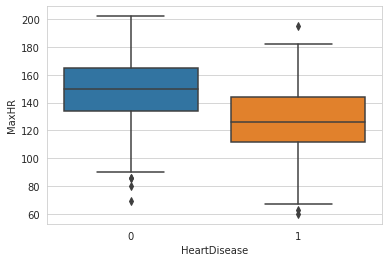

In [ ]:
sns.boxplot(x="HeartDisease", y="MaxHR", data=df)
plt.show()

There were outliers for MaxHR with HeartDisease of 0 and 1

####**ExerciseAngina**####

**Descriptive Statistics**

In [ ]:
df.ExerciseAngina.describe()

count     918
unique      2
top         N
freq      547
Name: ExerciseAngina, dtype: object

**Data Proportion**

In [ ]:
df.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
(df['ExerciseAngina'].value_counts()==1).sum()

0

In [ ]:
print(df.ExerciseAngina.value_counts(normalize=True)*100)
print('\n')

N    59.586057
Y    40.413943
Name: ExerciseAngina, dtype: float64




**Unique Values**

In [ ]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

**Number of Unique Values**

In [ ]:
df.ExerciseAngina.nunique()

2

**Count of RestingBP Bar Chart**

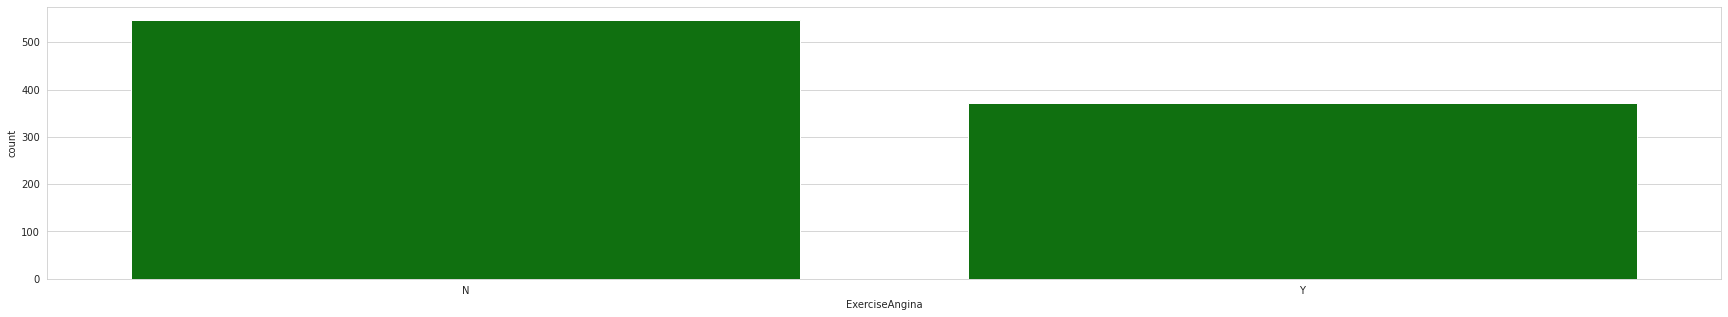

In [ ]:
plt.figure(figsize = (30,5))
sns.countplot(x="ExerciseAngina", data=df, color='green',palette=None)
RestingBP = df.ExerciseAngina.value_counts()
plt.show()

From the figure above, it can be seen that the highest value of count of ExerciseAngina is N.

**Cholesterol vs HeartDisease Bar Chart**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


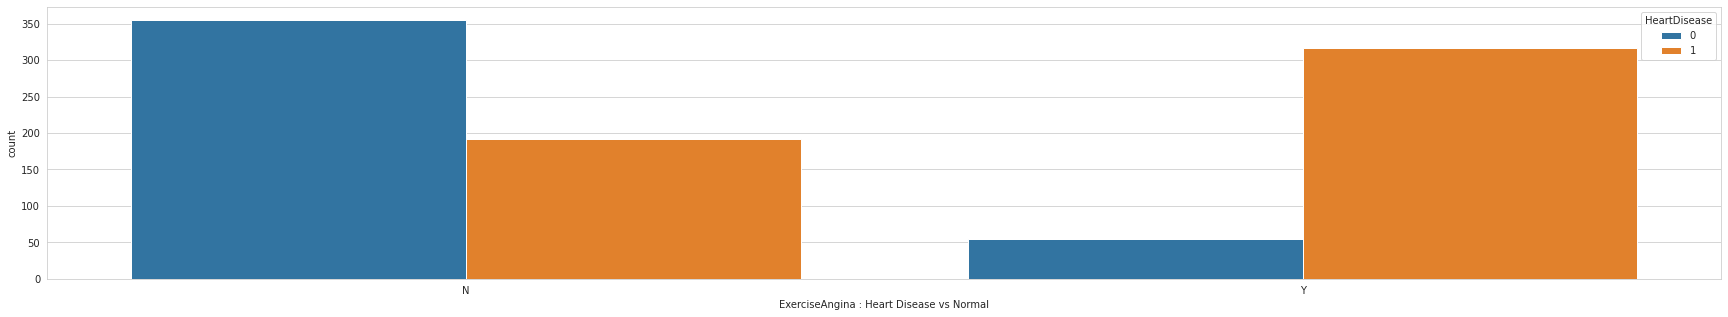

In [ ]:
plt.figure(figsize = (30,5))
sns.countplot('ExerciseAngina',hue='HeartDisease',data=df)
plt.xlabel('ExerciseAngina : Heart Disease vs Normal')
plt.legend(frameon=True, loc=1, title='HeartDisease')
plt.show()

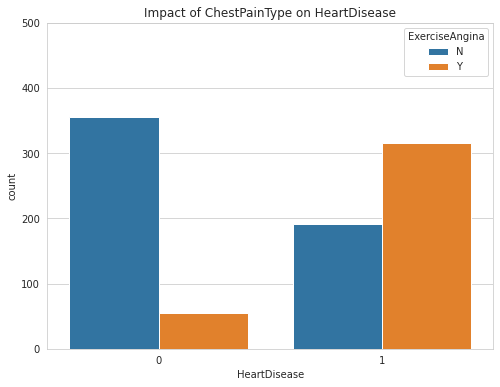

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='HeartDisease', data=df, hue='ExerciseAngina')
ax.set_ylim(0,500)
plt.title("Impact of ChestPainType on HeartDisease")
plt.show()

In [ ]:
df.groupby(['ExerciseAngina','HeartDisease'])['HeartDisease'].count().sort_values(ascending=False)

ExerciseAngina  HeartDisease
N               0               355
Y               1               316
N               1               192
Y               0                55
Name: HeartDisease, dtype: int64

From the figure above, it can be seen that the most person who had ExerciseAngina of y have bigger chance to had Heart Disease and who had ExerciseAngina of N have bigger chance to be Normal.


####**Oldpeak**####

**Descriptive Statistics**

In [ ]:
df.Oldpeak.describe()

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

**Data Proportion**

In [ ]:
df.Oldpeak.value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: Oldpeak, dtype: int64

In [ ]:
print(df.Oldpeak.value_counts(normalize=True)*100)
print('\n')

 0.0    40.087146
 1.0     9.368192
 2.0     8.278867
 1.5     5.773420
 3.0     3.050109
 1.2     2.832244
 0.2     2.396514
 0.5     2.069717
 1.4     1.960784
 1.8     1.851852
 2.5     1.742919
 0.8     1.742919
 1.6     1.742919
 0.1     1.525054
 0.6     1.525054
 0.4     1.198257
 0.3     1.198257
 4.0     0.871460
 0.7     0.762527
 2.8     0.762527
 1.9     0.762527
 1.3     0.762527
 2.6     0.762527
 1.1     0.762527
 1.7     0.653595
 2.2     0.544662
 0.9     0.435730
 2.4     0.435730
 3.6     0.435730
 3.4     0.326797
 4.2     0.217865
 3.5     0.217865
-0.5     0.217865
 2.3     0.217865
 3.2     0.217865
 2.1     0.217865
-1.0     0.217865
-0.1     0.217865
 5.6     0.108932
 2.9     0.108932
 6.2     0.108932
 3.8     0.108932
-1.5     0.108932
 3.1     0.108932
-2.0     0.108932
 3.7     0.108932
-0.8     0.108932
-0.7     0.108932
-1.1     0.108932
-2.6     0.108932
-0.9     0.108932
 5.0     0.108932
 4.4     0.108932
Name: Oldpeak, dtype: float64




**Unique Values**

In [ ]:
df.Oldpeak.unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

**Number of Unique Values**

In [ ]:
df.Oldpeak.nunique()

53

**Count of MaxHR Bar Chart**

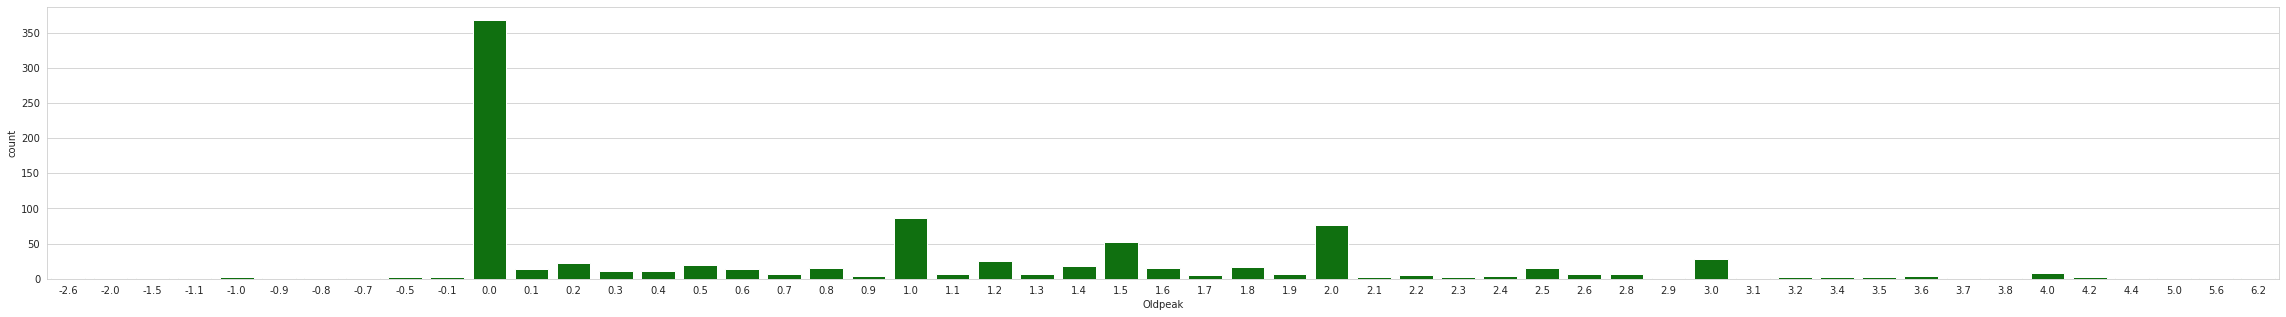

In [ ]:
plt.figure(figsize = (40,5))
sns.countplot(x="Oldpeak", data=df, color='green',palette=None)
RestingBP = df.Oldpeak.value_counts()
plt.show()

From the figure above, it can be seen that the highest value of count of Oldpeak is 0.0 and the lowest are -2.0, -1.5, -1.1, -0.9 , -0.8, -0.7, 2.9, 3.1 and 3.7. 

**Oldpeak vs HeartDisease Bar Chart**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


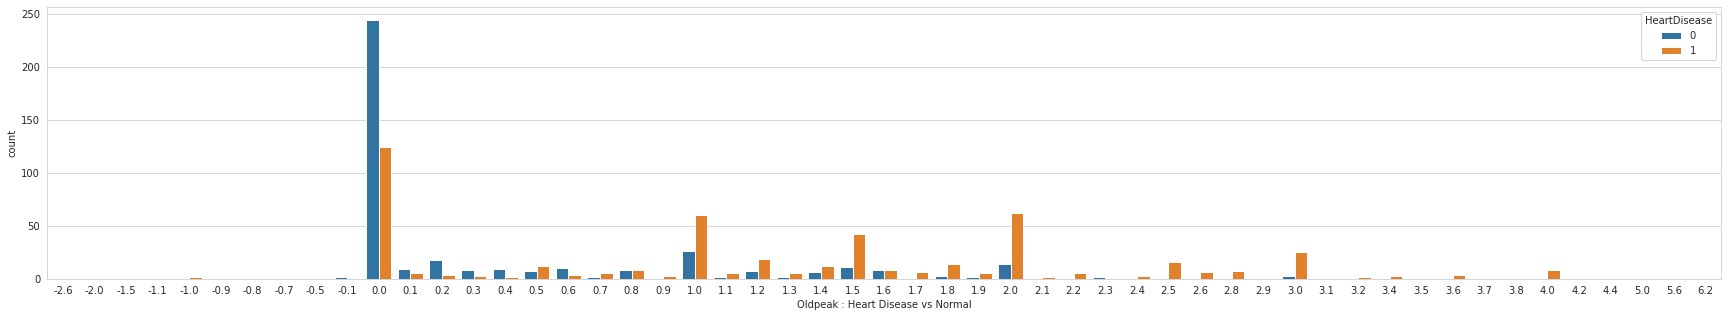

In [ ]:
plt.figure(figsize = (30,5))
sns.countplot('Oldpeak',hue='HeartDisease',data=df)
plt.xlabel('Oldpeak : Heart Disease vs Normal')
plt.legend(frameon=True, loc=1, title='HeartDisease')
plt.show()

In [ ]:
df.groupby(['Oldpeak','HeartDisease'])['HeartDisease'].count().sort_values(ascending=False)

Oldpeak  HeartDisease
 0.0     0               244
         1               124
 2.0     1                62
 1.0     1                60
 1.5     1                42
                        ... 
-0.8     1                 1
-0.9     1                 1
-1.1     0                 1
-1.5     1                 1
 6.2     1                 1
Name: HeartDisease, Length: 79, dtype: int64

From the figure above, it can be seen that the most person who had Oldpeak of 0.0 have bigger chance to had Heart Disease and also be Normal.

**Distribution Plot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


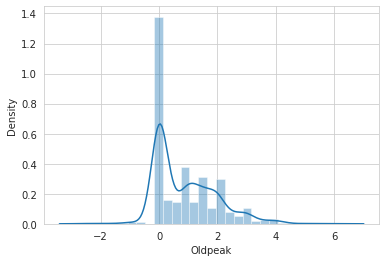

In [ ]:
sns.distplot(df['Oldpeak'])

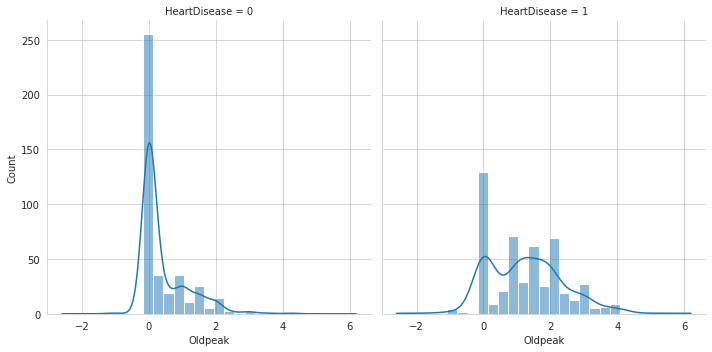

In [ ]:
sns.displot(data=df, x="Oldpeak", col='HeartDisease', kde=True)
plt.show()

Data is not normally distributed but negative skewness

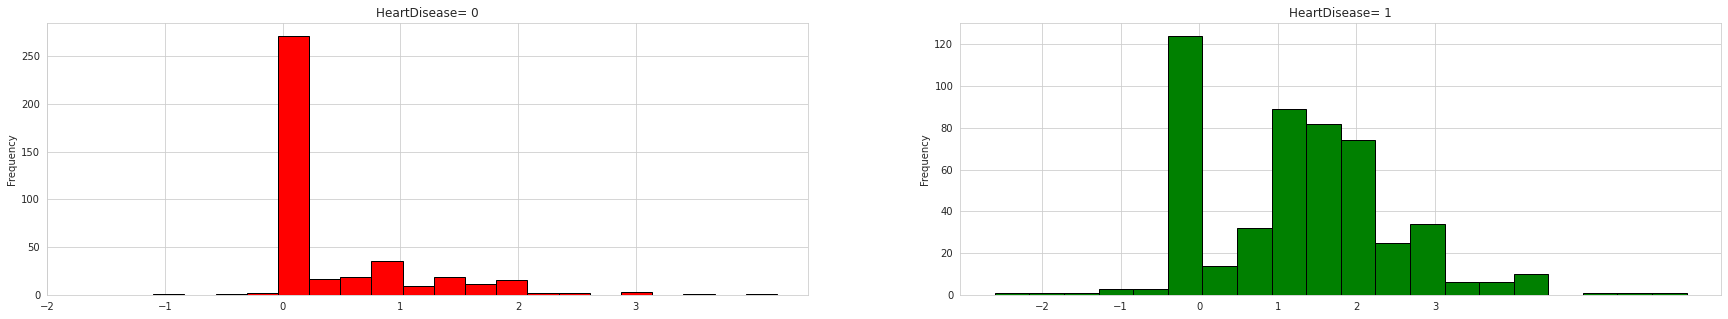

In [ ]:
f,ax=plt.subplots(1,2,figsize=(30,5))
df[df['HeartDisease']==0].Oldpeak.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('HeartDisease= 0')
x1=list(range(-2,4,1))
ax[0].set_xticks(x1)
df[df['HeartDisease']==1].Oldpeak.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('HeartDisease= 1')
x2=list(range(-2,4,1))
ax[1].set_xticks(x2)
plt.show()

Oldpeak of 0.0 have the highest HeartDisease of 1 and 0.

**Checking Outliers with Boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


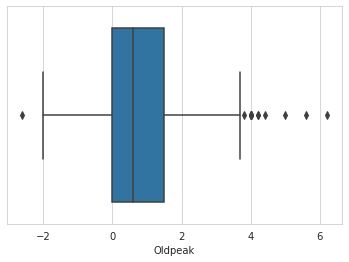

In [ ]:
sns.boxplot(df['Oldpeak'])

There are not outliers in MaxHR

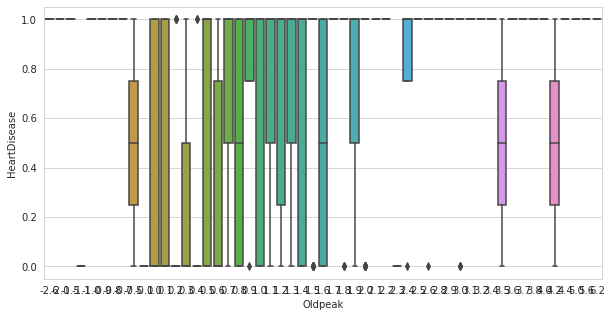

In [ ]:
plt.figure(figsize = (10,5))
sns.set_style("whitegrid")
  
sns.boxplot(x = 'Oldpeak', y = 'HeartDisease', data = df)

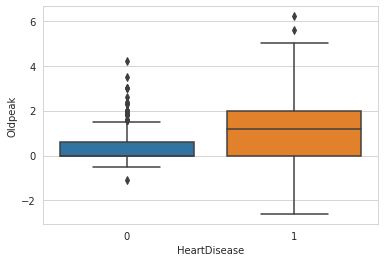

In [ ]:
sns.boxplot(x="HeartDisease", y="Oldpeak", data=df)
plt.show()

There were outliers for Oldpeak with HeartDisease of 0

####**ST_Slope**####

**Descriptive Statistics**

In [ ]:
df.ST_Slope.describe()

count      918
unique       3
top       Flat
freq       460
Name: ST_Slope, dtype: object

**Data Proportion**

In [ ]:
df.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
print(df.ST_Slope.value_counts(normalize=True)*100)
print('\n')

Flat    50.108932
Up      43.028322
Down     6.862745
Name: ST_Slope, dtype: float64




**Unique Values**

In [ ]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

**Number of Unique Values**

In [ ]:
df.ST_Slope.nunique()

3

**Count of Sex Bar Chart**

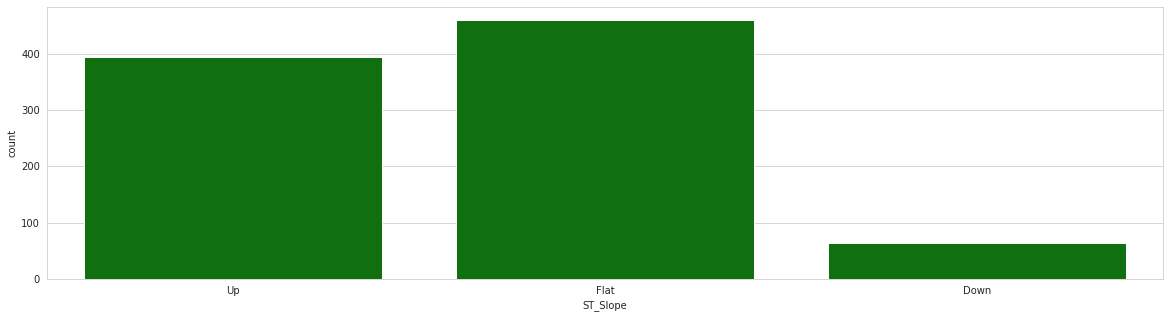

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot(x="ST_Slope", data=df, color='green',palette=None)
Sex = df.Sex.value_counts()
plt.show()

From the figure above, it can be seen that the highest frequncy of ST_Slope is Flat and the lowest is Down.

###**ST_Slope vs HeartDisease Bar Chart**###

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


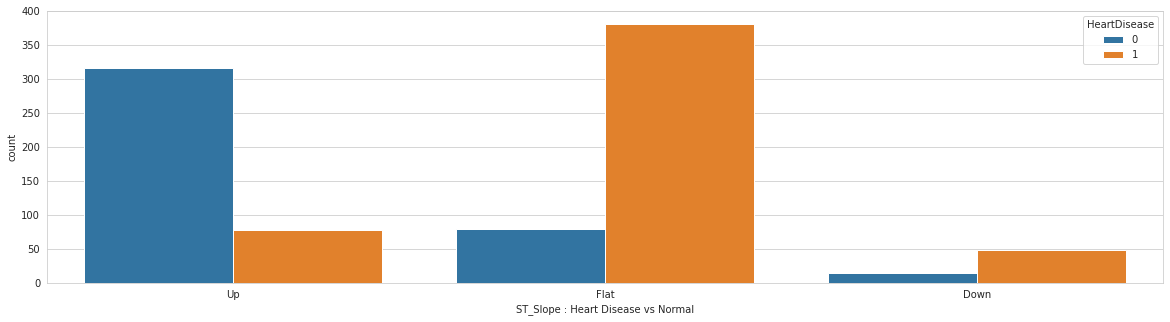

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot('ST_Slope',hue='HeartDisease',data=df)
plt.xlabel('ST_Slope : Heart Disease vs Normal')
plt.legend(frameon=True, loc=1, title='HeartDisease')
plt.show()

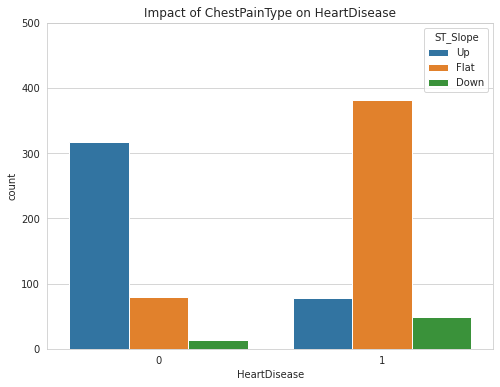

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='HeartDisease', data=df, hue='ST_Slope')
ax.set_ylim(0,500)
plt.title("Impact of ChestPainType on HeartDisease")
plt.show()

In [ ]:
df.groupby(['ST_Slope','HeartDisease'])['HeartDisease'].count().sort_values(ascending=False)

ST_Slope  HeartDisease
Flat      1               381
Up        0               317
Flat      0                79
Up        1                78
Down      1                49
          0                14
Name: HeartDisease, dtype: int64

From the figure above, it can be seen that ST_Slope of Flat have bigger chance to have Heart Disease and ST_Slope of Up have bigger chance to be Normal.


**Checking Outliers of All Columns**

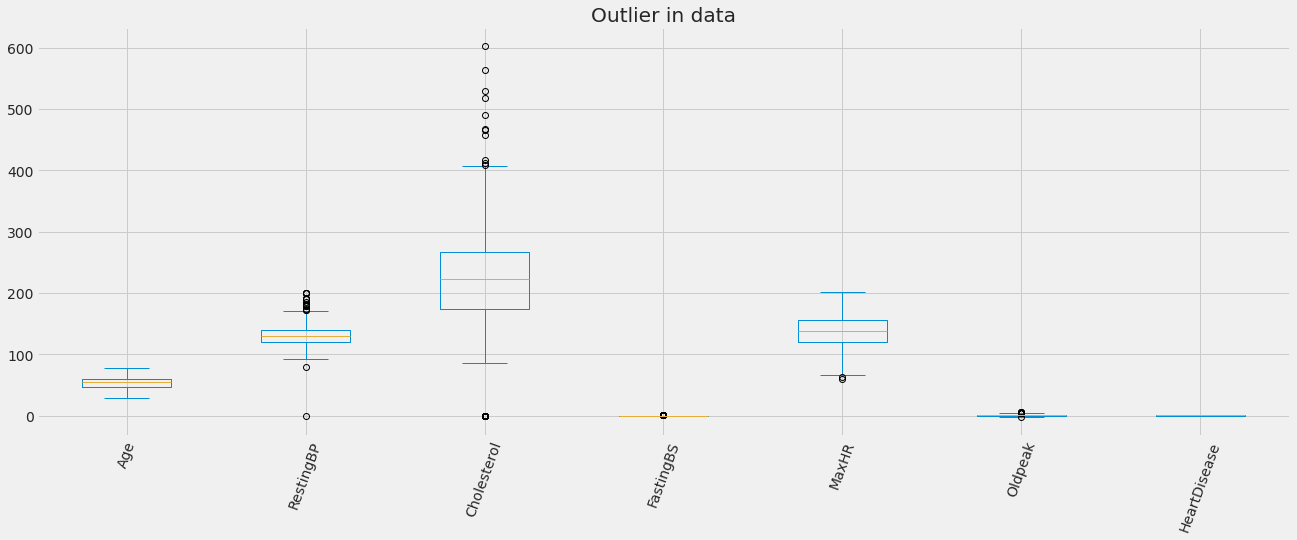

In [ ]:
# Checking Outliers

plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');

**Handling Outliers**

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
# Handling Outliers
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

outlier_list = ['RestingBP', 'Cholesterol', 'FastingBS',
'MaxHR', 'Oldpeak']
for i in df[outlier_list]:
    df[i]=treat_outlier(df[i])

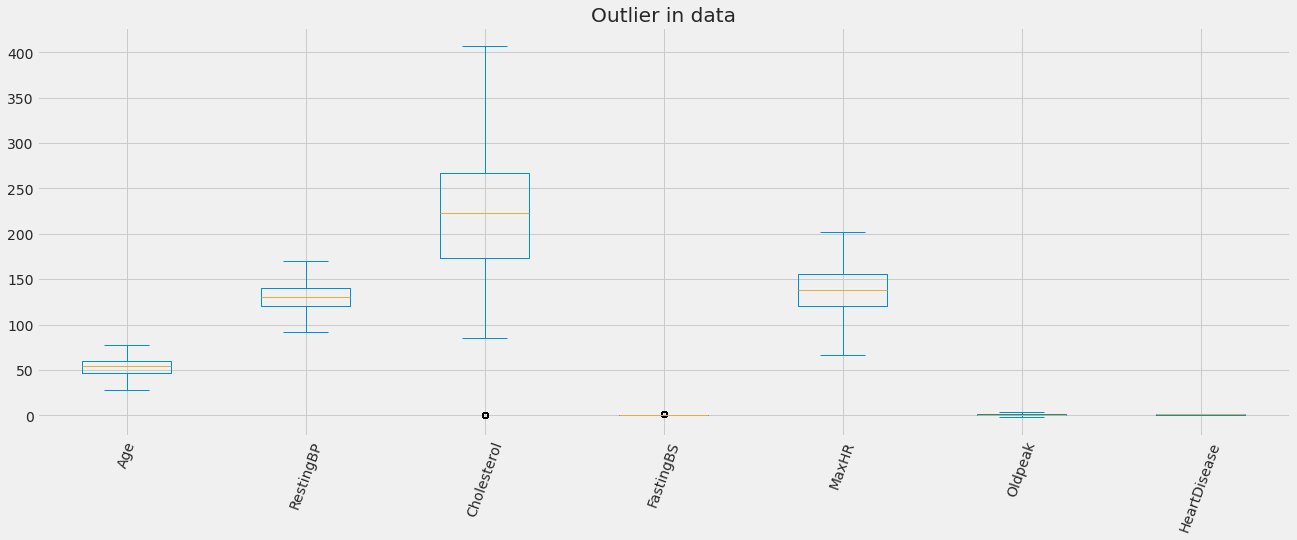

In [ ]:
# Checking Outliers after Handling Outliers

plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');

###**Data Preprocessing**####

**Checking Number of Unique Values of Categorical Features**

In [ ]:
# Looking at the percentage distribution of categorical data, if there is one value that dominates the feature, it will be discarded

for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

M    78.976035
F    21.023965
Name: Sex, dtype: float64


ASY    54.030501
NAP    22.113290
ATA    18.845316
TA      5.010893
Name: ChestPainType, dtype: float64


Normal    60.130719
LVH       20.479303
ST        19.389978
Name: RestingECG, dtype: float64


N    59.586057
Y    40.413943
Name: ExerciseAngina, dtype: float64


Flat    50.108932
Up      43.028322
Down     6.862745
Name: ST_Slope, dtype: float64




There is no single value that dominates the categorical data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


In [ ]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          57
Cholesterol       212
FastingBS           2
RestingECG          3
MaxHR             117
ExerciseAngina      2
Oldpeak            45
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [ ]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
df.FastingBS.value_counts()

0.0    704
1.0    214
Name: FastingBS, dtype: int64

In [ ]:
df.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [ ]:
df.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
df.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

**Data Transformation**

In [ ]:
categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]

In [ ]:
onehot = pd.get_dummies(df[categorical_cols], drop_first=True)

In [ ]:
onehot.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,1,1,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,1,0
2,1,1,0,0,0,1,0,0,1
3,0,0,0,0,1,0,1,1,0
4,1,0,1,0,1,0,0,0,1


In [ ]:
features = df.drop(columns = 'HeartDisease')

In [ ]:
features.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up
1,49,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat
2,37,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up
3,48,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up


In [ ]:
target = df['HeartDisease']

In [ ]:
numerical_cols = [col for col in features.columns.tolist() if col not in categorical_cols]

In [ ]:
numerical_cols

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [ ]:
categorical_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
std = features.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],axis=1)

**Normalization**

MinMaxScaler()

Checking Data Distribution before Normalization.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

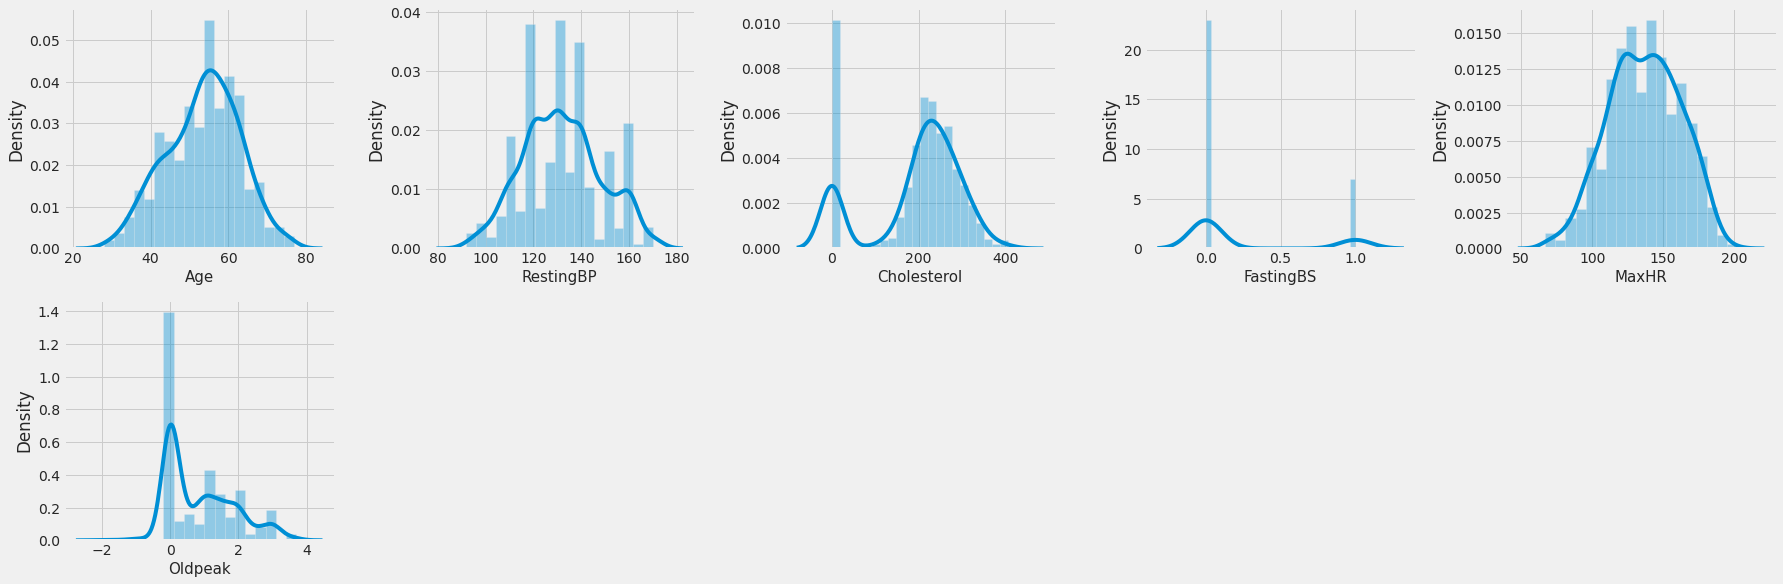

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in std.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(std[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

for column in std.columns:
    feature = np.array(std[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    std[column] = feature_scaled.reshape(1,-1)[0]

Checking Data Distribution after Normalization.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

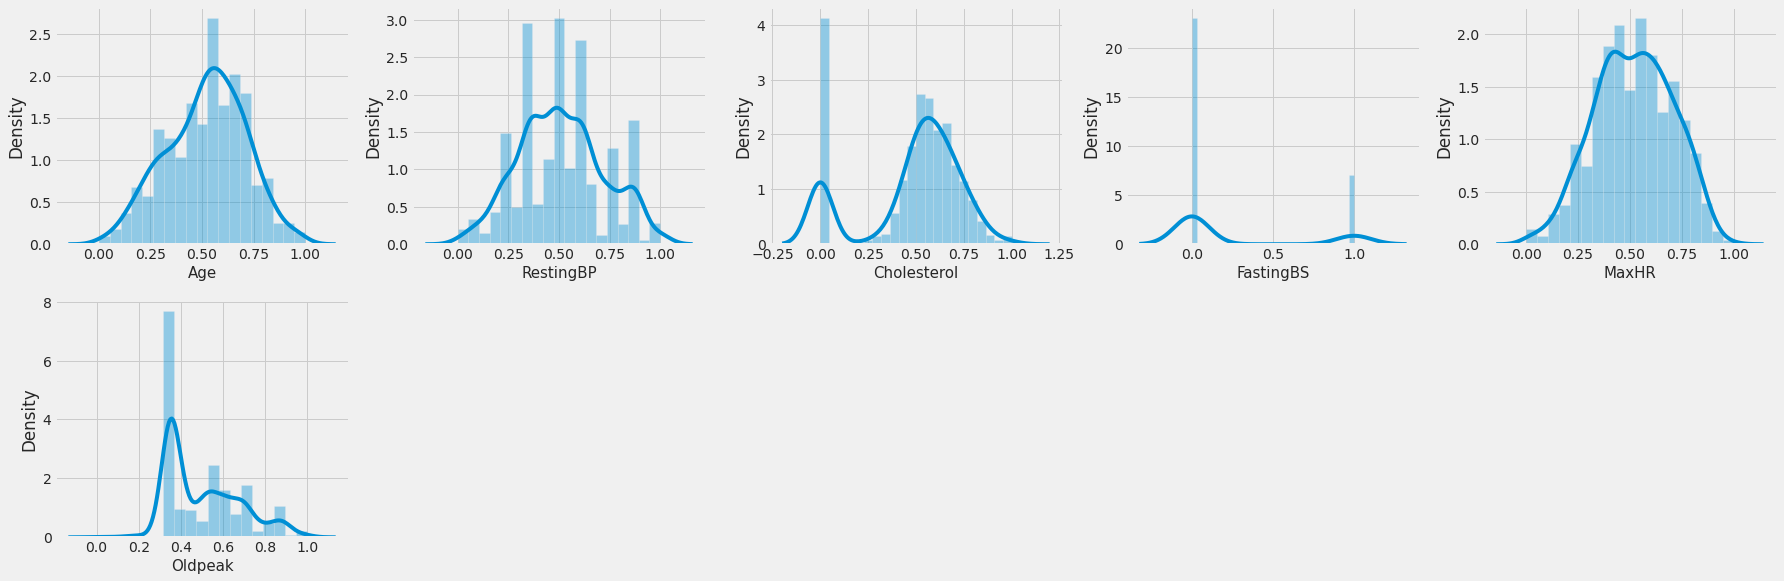

In [ ]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in std.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(std[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [ ]:
std.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0.244898,0.615385,0.710074,0.0,0.777778,0.350877
1,0.428571,0.871795,0.442260,0.0,0.659259,0.526316
2,0.183673,0.487179,0.695332,0.0,0.229630,0.350877
3,0.408163,0.589744,0.525799,0.0,0.303704,0.614035
4,0.530612,0.743590,0.479115,0.0,0.407407,0.350877


In [ ]:
data_model = pd.concat([onehot, std, target], axis=1)

**Merge the transformed columns**

In [ ]:
data_model.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,0,0,1,0,0,0,1,0.244898,0.615385,0.710074,0.0,0.777778,0.350877,0
1,0,0,1,0,1,0,0,1,0,0.428571,0.871795,0.442260,0.0,0.659259,0.526316,1
2,1,1,0,0,0,1,0,0,1,0.183673,0.487179,0.695332,0.0,0.229630,0.350877,0
3,0,0,0,0,1,0,1,1,0,0.408163,0.589744,0.525799,0.0,0.303704,0.614035,1
4,1,0,1,0,1,0,0,0,1,0.530612,0.743590,0.479115,0.0,0.407407,0.350877,0


**Train-Test Split**

In [ ]:
X=data_model.drop('HeartDisease',axis=1)
y=df['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234)

**Balancing (SMOTE Oversampling)**

In [ ]:
from imblearn.over_sampling import SMOTE

OS_SMOTE = SMOTE()

X_train, y_train = OS_SMOTE.fit_resample(X_train,y_train)

   Labels  HeartDisease
0       1           353
1       0           353


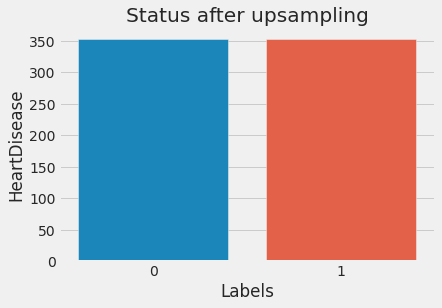

In [ ]:
oversample_plot = y_train.value_counts().reset_index()
oversample_plot.columns = ['Labels','HeartDisease']
print(oversample_plot)
sns.barplot(x='Labels',y='HeartDisease',data=oversample_plot);
plt.title('Status after upsampling');

**Principal Component Analysis (PCA)**

To reduce overfitting we do the PCA.

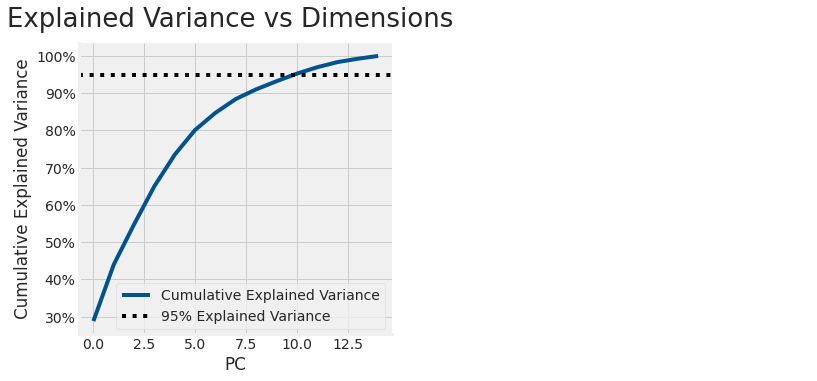

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.ticker as mtick
import matplotlib as mpl

pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]

# Visualize
fig, ax = plt.subplots(figsize =(5, 5))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'Ubuntu'
mpl.rcParams['font.size'] = 14

ax.plot(d,cumsum, color = '#00538F', label='Cumulative Explained Variance')

ax.axhline(y = 95, color='black', linestyle=':', label = '95% Explained Variance')
ax.legend(loc='best')

# Remove ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Remove axes splines
for i in ['top','right']:
    ax.spines[i].set_visible(False)

# Set percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# annotation arrow
arrowprops = dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90")
plt.annotate('Principal Component Number 19', 
             xy=(19, 95), 
             xytext=(19+5, 95+10), 
             arrowprops=arrowprops,
             size = 14)

plt.legend(bbox_to_anchor = (1, 0.2))

plt.suptitle('Explained Variance vs Dimensions', size=26)
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('PC');

In [ ]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
df.columns()

TypeError: ignored

###**Modeling**###

Using Random Forest Classifier for Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

**Checking Feature Importance**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
data_model.info()

**Model Evaluation**

In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rfc_train_acc = accuracy_score(y_train, rfc.predict(X_train))
y_pred = rfc.predict(X_test)
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest Classifier is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest Classifier is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Test data performance

from sklearn.metrics import *

print("Test Accuracy Score:",accuracy_score(rfc.predict(X_test), y_test))
print("Test Precision:",precision_score(rfc.predict(X_test), y_test))
print("Test Recall:",recall_score(rfc.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(rfc.predict(X_test), y_test))

**Feature Selection**

In [ ]:
data_model.columns

Choose Columns with feature importance > 0.02

In [ ]:
# selected_columns = ['ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up','Age','RestingBP','Cholesterol','MaxHR','Oldpeak','HeartDisease']

In [ ]:
selected_columns = ['Sex_M','ChestPainType_ATA','ChestPainType_NAP','FastingBS','ExerciseAngina_Y','ST_Slope_Flat','ST_Slope_Up','Age','RestingBP','Cholesterol','MaxHR','Oldpeak','HeartDisease']

In [ ]:
data_model_fs = data_model[selected_columns].copy()

In [ ]:
data_model_fs.head()

In [ ]:
X = data_model_fs.drop('HeartDisease', axis=1)
y = data_model_fs['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_fs = RandomForestClassifier(max_depth=4)
rfc_fs.fit(X_train, y_train)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rfc_train_acc = accuracy_score(y_train, rfc_fs.predict(X_train))
y_pred = rfc_fs.predict(X_test)
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest Classifier is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest Classifier is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Test data performance

print("Test Accuracy Score:",accuracy_score(rfc_fs.predict(X_test), y_test))
print("Test Precision:",precision_score(rfc_fs.predict(X_test), y_test))
print("Test Recall:",recall_score(rfc_fs.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(rfc_fs.predict(X_test), y_test))

Feature Selection makes model performance decreases so we don't use feature selection and continue using hypertuning parameters (GridSearchCV) to improve model performance

**Hyperparameters Tuning using GridSearchCV** 

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' : ['gini', 'entropy']
}

grid = GridSearchCV(model, param_grid = param_grid, cv=4)
grid.fit(X, y)
best_estimator = grid.best_estimator_
best_estimator

RandomForestClassifier(max_depth=6, n_estimators=500)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_gs = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=500)
rfc_gs.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=500)

In [ ]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rfc_train_acc = accuracy_score(y_train, rfc_gs.predict(X_train))
y_pred = rfc_gs.predict(X_test)
rfc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest Classifier is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest Classifier is : {rfc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest Classifier is : 0.9291784702549575
Test accuracy of Random Forest Classifier is : 0.8768115942028986
[[102  19]
 [ 15 140]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       121
           1       0.88      0.90      0.89       155

    accuracy                           0.88       276
   macro avg       0.88      0.87      0.87       276
weighted avg       0.88      0.88      0.88       276



In [ ]:
# Test data performance

from sklearn.metrics import *

print("Test Accuracy Score:",accuracy_score(rfc_gs.predict(X_test), y_test))
print("Test Precision:",precision_score(rfc_gs.predict(X_test), y_test))
print("Test Recall:",recall_score(rfc_gs.predict(X_test), y_test))
print("Test ROC AUC Score:",roc_auc_score(rfc_gs.predict(X_test), y_test))

Test Accuracy Score: 0.8768115942028986
Test Precision: 0.9032258064516129
Test Recall: 0.8805031446540881
Test ROC AUC Score: 0.87614900822448


**Model performance improves after doing Hypertuning using GridSearchCV**